In [180]:
# To check current mpl package
#pip list grep mplsoccer

In [181]:
#upgrade mpl package
#pip install --upgrade mplsoccer

In [182]:
from mplsoccer import VerticalPitch, Sbopen, FontManager, Pitch
import os 
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from statsbombpy import sb
%matplotlib inline

In [183]:
df=sb.competitions()
df

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2023-08-17T23:51:11.837478,None,None,2023-08-17T23:51:11.837478
1,16,4,Europe,Champions League,male,False,False,2018/2019,2023-03-07T12:20:48.118250,2021-06-13T16:17:31.694,None,2023-03-07T12:20:48.118250
2,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
3,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
4,16,27,Europe,Champions League,male,False,False,2015/2016,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
...,...,...,...,...,...,...,...,...,...,...,...,...
62,55,43,Europe,UEFA Euro,male,False,True,2020,2023-02-24T21:26:47.128979,2023-04-27T22:38:34.970148,2023-04-27T22:38:34.970148,2023-02-24T21:26:47.128979
63,35,75,Europe,UEFA Europa League,male,False,False,1988/1989,2023-06-18T19:28:39.443883,2021-06-13T16:17:31.694,None,2023-06-18T19:28:39.443883
64,53,106,Europe,UEFA Women's Euro,female,False,True,2022,2023-07-17T21:19:03.032991,2023-07-17T21:21:56.497106,2023-07-17T21:21:56.497106,2023-07-17T21:19:03.032991
65,72,107,International,Women's World Cup,female,False,True,2023,2023-09-01T12:34:19.705316,2023-09-01T12:35:45.762196,2023-09-01T12:35:45.762196,2023-09-01T12:34:19.705316


In [184]:
df.competition_name.value_counts()

La Liga                    18
Champions League           18
FIFA World Cup              8
Copa del Rey                3
FA Women's Super League     3
Women's World Cup           2
Premier League              2
Liga Profesional            2
Serie A                     2
UEFA Women's Euro           1
UEFA Europa League          1
UEFA Euro                   1
1. Bundesliga               1
NWSL                        1
North American League       1
Indian Super league         1
FIFA U20 World Cup          1
Ligue 1                     1
Name: competition_name, dtype: int64

In [185]:
df=df[df.competition_name=="Women's World Cup"]
df

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
65,72,107,International,Women's World Cup,female,False,True,2023,2023-09-01T12:34:19.705316,2023-09-01T12:35:45.762196,2023-09-01T12:35:45.762196,2023-09-01T12:34:19.705316
66,72,30,International,Women's World Cup,female,False,True,2019,2023-07-27T10:33:48.273734,2021-06-13T16:17:31.694,None,2023-07-27T10:33:48.273734


In [186]:
col=sb.matches(competition_id=72, season_id=107)
col.head(2)
#"Colombia Women's"

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3904629,2023-08-16,13:00:00.000,International - Women's World Cup,2023,Australia Women's,England Women's,1,3,available,...,2023-08-30T11:17:47.551826,6,Semi-finals,Accor Stadium,Tori Penso,Tony Gustavsson,Sarina Glotzbach-Wiegman,1.1.0,2,2
1,3906390,2023-08-20,13:00:00.000,International - Women's World Cup,2023,Spain Women's,England Women's,1,0,available,...,2023-08-22T19:38:43.965521,7,Final,Accor Stadium,Tori Penso,Jorge Vilda,Sarina Glotzbach-Wiegman,1.1.0,2,2


In [187]:
col=col[(col.home_team=="Colombia Women's") | (col.away_team=="Colombia Women's")]
col

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
10,3901832,2023-08-08,11:00:00.000,International - Women's World Cup,2023,Colombia Women's,Jamaica Women's,1,0,available,...,2023-08-29T20:47:22.698938,4,Round of 16,AAMI Park,Kate Jacewicz,Nelson Abadía Aragón,Lorne Julian Donaldson,1.1.0,2,2
12,3902967,2023-08-12,13:30:00.000,International - Women's World Cup,2023,England Women's,Colombia Women's,2,1,available,...,2023-08-31T18:33:33.643867,5,Quarter-finals,Accor Stadium,Katja Koroleva,Sarina Glotzbach-Wiegman,Nelson Abadía Aragón,1.1.0,2,2
39,3893834,2023-08-03,13:00:00.000,International - Women's World Cup,2023,Morocco Women's,Colombia Women's,1,0,available,...,2023-08-11T23:49:38.789986,3,Group Stage,HBF Park,Maria Sole Ferrieri Caputi,Reynald Pedros,Nelson Abadía Aragón,1.1.0,2,2
52,3893818,2023-07-30,12:30:00.000,International - Women's World Cup,2023,Germany Women's,Colombia Women's,1,2,available,...,2023-08-25T16:06:34.832910,2,Group Stage,Allianz Stadium (Sydney),Melissa Paola Borjas Pastrana,Martina Voss-Tecklenburg,Angelo Marsiglia,1.1.0,2,2
58,3893802,2023-07-25,05:00:00.000,International - Women's World Cup,2023,Colombia Women's,Korea Republic Women's,2,0,available,...,2023-08-14T12:28:53.852839,1,Group Stage,Allianz Stadium (Sydney),Rebecca Welch,Angelo Marsiglia,Colin Bell,1.1.0,2,2


In [188]:
colgames=col.match_id.to_list()
colgames

[3901832, 3902967, 3893834, 3893818, 3893802]

In [189]:
games=[] #empty list to fill with matches id
for match in colgames:
    matches = sb.events(match_id=match) #df to fill with events
    games.append(matches) #all events appended
col = pd.concat(games, ignore_index=True) #all events concat
col #all games events concat

,50_50,ball_receipt_outcome,ball_recovery_recovery_failure,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_other,...,shot_aerial_won,bad_behaviour_card,block_deflection,foul_committed_penalty,foul_committed_type,foul_won_penalty,goalkeeper_punched_out,ball_recovery_offensive,goalkeeper_shot_saved_off_target,shot_saved_off_target
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16859,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16860,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16861,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [190]:
col['shot_saved_off_target'].unique()

array([nan, True], dtype=object)

In [191]:
coldf=col[['ball_receipt_outcome', 'counterpress','dribble_outcome','duel_outcome', 'duel_type',
           'interception_outcome','location', 'minute', 'second','pass_cross', 'pass_end_location',
           'pass_goal_assist','pass_length','pass_outcome', 'pass_recipient','pass_shot_assist',
           'pass_through_ball','pass_type', 'period', 'play_pattern', 'player', 'player_id', 'position',
           'possession_team', 'team', 'shot_end_location','type','shot_outcome', 'substitution_replacement',
           'tactics','under_pressure','pass_cut_back', 'block_deflection' ]]
coldf

,ball_receipt_outcome,counterpress,dribble_outcome,duel_outcome,duel_type,interception_outcome,location,minute,second,pass_cross,...,possession_team,team,shot_end_location,type,shot_outcome,substitution_replacement,tactics,under_pressure,pass_cut_back,block_deflection
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,...,Colombia Women's,Colombia Women's,NaN,Starting XI,NaN,NaN,"{'formation': 4231, 'lineup': [{'player': {'id...",NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,...,Colombia Women's,Jamaica Women's,NaN,Starting XI,NaN,NaN,"{'formation': 4231, 'lineup': [{'player': {'id...",NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,...,Colombia Women's,Colombia Women's,NaN,Half Start,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,...,Colombia Women's,Jamaica Women's,NaN,Half Start,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45,0,NaN,...,Colombia Women's,Jamaica Women's,NaN,Half Start,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16859,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67,50,NaN,...,Colombia Women's,Korea Republic Women's,NaN,Substitution,NaN,Chae-Rim Kang,NaN,NaN,NaN,NaN
16860,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75,43,NaN,...,Korea Republic Women's,Colombia Women's,NaN,Substitution,NaN,Marcela Restrepo Valencia,NaN,NaN,NaN,NaN
16861,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77,11,NaN,...,Colombia Women's,Korea Republic Women's,NaN,Substitution,NaN,Casey Yu-Jin Phair,NaN,NaN,NaN,NaN
16862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86,37,NaN,...,Colombia Women's,Colombia Women's,NaN,Substitution,NaN,Diana Carolina Ospina García Pineda,NaN,NaN,NaN,NaN


In [192]:
formation=coldf[(coldf.type=='Starting XI') & (coldf['team']=="Colombia Women's")] #extract all formations at the beggining of the games
formation

,ball_receipt_outcome,counterpress,dribble_outcome,duel_outcome,duel_type,interception_outcome,location,minute,second,pass_cross,...,possession_team,team,shot_end_location,type,shot_outcome,substitution_replacement,tactics,under_pressure,pass_cut_back,block_deflection
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,...,Colombia Women's,Colombia Women's,NaN,Starting XI,NaN,NaN,"{'formation': 4231, 'lineup': [{'player': {'id...",NaN,NaN,NaN
3013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,...,England Women's,Colombia Women's,NaN,Starting XI,NaN,NaN,"{'formation': 4231, 'lineup': [{'player': {'id...",NaN,NaN,NaN
6681,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,...,Morocco Women's,Colombia Women's,NaN,Starting XI,NaN,NaN,"{'formation': 4231, 'lineup': [{'player': {'id...",NaN,NaN,NaN
10157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,...,Germany Women's,Colombia Women's,NaN,Starting XI,NaN,NaN,"{'formation': 4231, 'lineup': [{'player': {'id...",NaN,NaN,NaN
13787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,...,Colombia Women's,Colombia Women's,NaN,Starting XI,NaN,NaN,"{'formation': 4231, 'lineup': [{'player': {'id...",NaN,NaN,NaN


In [193]:
formationdf= pd.DataFrame.from_records(formation.tactics) #separates in different columns according to the commas in the (dictinoary)
formationdf

,formation,lineup
0,4231,"[{'player': {'id': 46344, 'name': 'Catalina Pé..."
1,4231,"[{'player': {'id': 46344, 'name': 'Catalina Pé..."
2,4231,"[{'player': {'id': 46344, 'name': 'Catalina Pé..."
3,4231,"[{'player': {'id': 46344, 'name': 'Catalina Pé..."
4,4231,"[{'player': {'id': 46344, 'name': 'Catalina Pé..."


## Preferred line up 

In [194]:
formationdf.formation.value_counts()

4231    5
Name: formation, dtype: int64

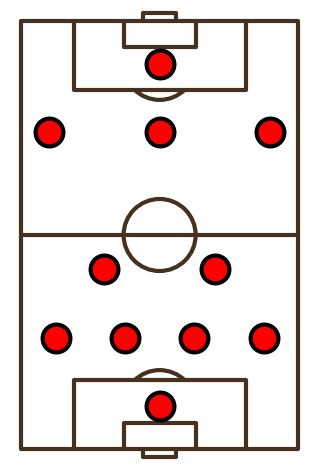

In [195]:
pitch=VerticalPitch(pitch_type='wyscout', goal_type='box',line_color='#46301E',linewidth=3)
fig,ax=pitch.draw()
sc=pitch.formation('4231',ax=ax, s=400, color='r',edgecolor='black', linewidth=3)
#sc=pitch.formation('4231',ax=ax, s=400, color='y', marker='*', edgecolor='b', hatch='||', linewidth=1)

fig.savefig('Formation Colombia.svg', format='svg', dpi=100, transparent=True)

In [196]:
# Create an empty list to store player names for each game
player_names_list = []

# Iterate through the DataFrame and extract player names for each game
for lineup in formationdf['lineup']:
    player_names = [player_info['player']['name'] for player_info in lineup]
    player_names_list.append(player_names)

# Add a new column with player names for each game
formationdf['player_names'] = player_names_list

# Drop the 'lineup' column if you no longer need it
formationdf.drop(columns=['lineup'], inplace=True)

formationdf


,formation,player_names
0,4231,"[Catalina Pérez Jaramillo, Carolina Arias Vida..."
1,4231,"[Catalina Pérez Jaramillo, Carolina Arias Vida..."
2,4231,"[Catalina Pérez Jaramillo, Carolina Arias Vida..."
3,4231,"[Catalina Pérez Jaramillo, Carolina Arias Vida..."
4,4231,"[Catalina Pérez Jaramillo, Carolina Arias Vida..."


In [197]:
formationdf['player_names'] = formationdf['player_names'].apply(', '.join)
formationdf

,formation,player_names
0,4231,"Catalina Pérez Jaramillo, Carolina Arias Vidal..."
1,4231,"Catalina Pérez Jaramillo, Carolina Arias Vidal..."
2,4231,"Catalina Pérez Jaramillo, Carolina Arias Vidal..."
3,4231,"Catalina Pérez Jaramillo, Carolina Arias Vidal..."
4,4231,"Catalina Pérez Jaramillo, Carolina Arias Vidal..."


In [198]:
# Split the comma-separated names in the 'player_names' column and flatten them
all_player_names = [name.strip() for names in formationdf['player_names'] for name in names.split(',')]

# Create a list of unique player names
unique_player_names = list(set(all_player_names))

# Print the unique player names
unique_player_names

['Manuela Vanegas Cataño',
 'Linda Lizeth Caicedo Alegría',
 'Catalina Pérez Jaramillo',
 'Lorena Bedoya Durango',
 'Daniela Montoya Quiróz',
 'Diana Carolina Ospina García Pineda',
 'Jorelyn Andrea Daniela Carabalí Martínez',
 'Carolina Arias Vidal',
 'María Catalina Usme Pineda',
 'Leicy Maria Santos Herrera',
 'Ana María Guzmán Zapata',
 'Mayra Tatiana Ramírez Ramírez',
 'Daniela Alexandra Árias Rojas',
 'Lady Patricia Andrade Rodríguez']

In [199]:
# Initialize a dictionary to count player occurrences
player_counts = {player: 0 for player in unique_player_names}

# Count player occurrences in each row
for player in unique_player_names:
    formationdf[player] = formationdf['player_names'].str.count(player)
    player_counts[player] = formationdf[player].sum()

# Convert player counts to a DataFrame
player_counts_df = pd.DataFrame(player_counts.items(), columns=['Player', 'Count'])
player_counts_df=player_counts_df.sort_values(by='Count', ascending=False)
player_counts_df.reset_index(inplace=True)
player_counts_df

,index,Player,Count
0,1,Linda Lizeth Caicedo Alegría,5
1,2,Catalina Pérez Jaramillo,5
2,3,Lorena Bedoya Durango,5
3,6,Jorelyn Andrea Daniela Carabalí Martínez,5
4,7,Carolina Arias Vidal,5
5,8,María Catalina Usme Pineda,5
6,11,Mayra Tatiana Ramírez Ramírez,5
7,12,Daniela Alexandra Árias Rojas,5
8,0,Manuela Vanegas Cataño,4
9,9,Leicy Maria Santos Herrera,4


In [200]:
player_counts_df.drop(columns='index',inplace=True)
player_counts_df.rename(columns={'Player':'player'}, inplace=True)
player_counts_df

,player,Count
0,Linda Lizeth Caicedo Alegría,5
1,Catalina Pérez Jaramillo,5
2,Lorena Bedoya Durango,5
3,Jorelyn Andrea Daniela Carabalí Martínez,5
4,Carolina Arias Vidal,5
5,María Catalina Usme Pineda,5
6,Mayra Tatiana Ramírez Ramírez,5
7,Daniela Alexandra Árias Rojas,5
8,Manuela Vanegas Cataño,4
9,Leicy Maria Santos Herrera,4


In [201]:
position=coldf[['player','position','team']]
position=position[(position.position.notna()) & (position.team=="Colombia Women's")]
position=position[['player','position']]


In [202]:
merged_df = player_counts_df.merge(position[['player','position']], on='player', how='left')
merged_df = merged_df.drop_duplicates(subset=['player'])
merged_df

,player,Count,position
0,Linda Lizeth Caicedo Alegría,5,Left Wing
838,Catalina Pérez Jaramillo,5,Goalkeeper
1055,Lorena Bedoya Durango,5,Left Defensive Midfield
1778,Jorelyn Andrea Daniela Carabalí Martínez,5,Right Center Back
2328,Carolina Arias Vidal,5,Right Back
2963,María Catalina Usme Pineda,5,Center Forward
3890,Mayra Tatiana Ramírez Ramírez,5,Right Wing
4854,Daniela Alexandra Árias Rojas,5,Left Center Back
5330,Manuela Vanegas Cataño,4,Left Back
6087,Leicy Maria Santos Herrera,4,Center Attacking Midfield


## Initial Formation

In [203]:
initial_formation=merged_df.head(11)
initial_formation

,player,Count,position
0,Linda Lizeth Caicedo Alegría,5,Left Wing
838,Catalina Pérez Jaramillo,5,Goalkeeper
1055,Lorena Bedoya Durango,5,Left Defensive Midfield
1778,Jorelyn Andrea Daniela Carabalí Martínez,5,Right Center Back
2328,Carolina Arias Vidal,5,Right Back
2963,María Catalina Usme Pineda,5,Center Forward
3890,Mayra Tatiana Ramírez Ramírez,5,Right Wing
4854,Daniela Alexandra Árias Rojas,5,Left Center Back
5330,Manuela Vanegas Cataño,4,Left Back
6087,Leicy Maria Santos Herrera,4,Center Attacking Midfield


In [204]:
#it may not run if mpl package is not updated, check top to see how to update

In [205]:
print(dir(Pitch))

['__abstractmethods__', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_arc_angles_equal_aspect', '_diameter_circle_equal_aspect', '_draw_arc', '_draw_ax', '_draw_circles_and_arcs', '_draw_ellipse', '_draw_goals', '_draw_juego_de_posicion', '_draw_line', '_draw_pitch_markings', '_draw_rectangle', '_draw_shade_middle', '_draw_stripe', '_draw_stripe_grass', '_init_circles_and_arcs', '_init_circles_and_arcs_equal_aspect', '_plain_stripes', '_reflect_2d', '_reverse_annotate_if_vertical', '_reverse_if_vertical', '_reverse_vertices_if_vertical', '_scale_pad', '_set_axes', '_set_background', '_set_extent', '_set_multiple_attributes', '_setup_subplots', '_t

In [206]:
initial_formation_list=initial_formation.player.to_list()
initial_formation_list

['Linda Lizeth Caicedo Alegría',
 'Catalina Pérez Jaramillo',
 'Lorena Bedoya Durango',
 'Jorelyn Andrea Daniela Carabalí Martínez',
 'Carolina Arias Vidal',
 'María Catalina Usme Pineda',
 'Mayra Tatiana Ramírez Ramírez',
 'Daniela Alexandra Árias Rojas',
 'Manuela Vanegas Cataño',
 'Leicy Maria Santos Herrera',
 'Daniela Montoya Quiróz']

In [207]:
locationcol=coldf[coldf.player.isin(unique_player_names)]
locationcol[['player','location','pass_end_location','position']]

,player,location,pass_end_location,position
18,Diana Carolina Ospina García Pineda,"[17.3, 64.6]","[30.4, 67.8]",Right Defensive Midfield
19,Leicy Maria Santos Herrera,"[29.5, 67.8]","[26.8, 76.5]",Center Attacking Midfield
20,Mayra Tatiana Ramírez Ramírez,"[26.8, 76.5]","[19.2, 70.7]",Right Wing
21,Carolina Arias Vidal,"[24.0, 71.8]","[35.7, 71.8]",Right Back
22,Leicy Maria Santos Herrera,"[35.1, 71.8]","[24.0, 69.3]",Center Attacking Midfield
...,...,...,...,...
16849,Leicy Maria Santos Herrera,"[89.9, 48.3]",NaN,Center Forward
16851,Leicy Maria Santos Herrera,"[83.3, 12.6]",NaN,Center Attacking Midfield
16853,Lorena Bedoya Durango,"[51.6, 44.4]",NaN,Right Defensive Midfield
16860,Leicy Maria Santos Herrera,NaN,NaN,Right Wing


In [208]:
locationcol[['x','y']]=locationcol.location.apply(pd.Series)
locationcol[['x_end','y_end']]=locationcol.pass_end_location.apply(pd.Series)
locationcol=locationcol.drop(['location','pass_end_location'], axis=1)
locationcol[['player','pass_recipient','x','y','x_end','y_end','position']]

C:\Users\Interventoria\AppData\Local\Temp\ipykernel_7648\1549496890.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Interventoria\AppData\Local\Temp\ipykernel_7648\1549496890.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Interventoria\AppData\Local\Temp\ipykernel_7648\1549496890.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

,player,pass_recipient,x,y,x_end,y_end,position
18,Diana Carolina Ospina García Pineda,Leicy Maria Santos Herrera,17.3,64.6,30.4,67.8,Right Defensive Midfield
19,Leicy Maria Santos Herrera,Mayra Tatiana Ramírez Ramírez,29.5,67.8,26.8,76.5,Center Attacking Midfield
20,Mayra Tatiana Ramírez Ramírez,Carolina Arias Vidal,26.8,76.5,19.2,70.7,Right Wing
21,Carolina Arias Vidal,Leicy Maria Santos Herrera,24.0,71.8,35.7,71.8,Right Back
22,Leicy Maria Santos Herrera,Carolina Arias Vidal,35.1,71.8,24.0,69.3,Center Attacking Midfield
...,...,...,...,...,...,...,...
16849,Leicy Maria Santos Herrera,NaN,89.9,48.3,NaN,NaN,Center Forward
16851,Leicy Maria Santos Herrera,NaN,83.3,12.6,NaN,NaN,Center Attacking Midfield
16853,Lorena Bedoya Durango,NaN,51.6,44.4,NaN,NaN,Right Defensive Midfield
16860,Leicy Maria Santos Herrera,NaN,NaN,NaN,NaN,NaN,Right Wing


In [209]:
locationcol[['player','x','y']]

,player,x,y
18,Diana Carolina Ospina García Pineda,17.3,64.6
19,Leicy Maria Santos Herrera,29.5,67.8
20,Mayra Tatiana Ramírez Ramírez,26.8,76.5
21,Carolina Arias Vidal,24.0,71.8
22,Leicy Maria Santos Herrera,35.1,71.8
...,...,...,...
16849,Leicy Maria Santos Herrera,89.9,48.3
16851,Leicy Maria Santos Herrera,83.3,12.6
16853,Lorena Bedoya Durango,51.6,44.4
16860,Leicy Maria Santos Herrera,NaN,NaN


In [210]:
#Avg. location
avg_location=locationcol.groupby('player').agg({'position':'first','x':['mean'], 'y':['mean','count']})
avg_location.columns=['position','x','y','count']
avg_location

,position,x,y,count
player,,,,
Ana María Guzmán Zapata,Left Back,52.148800,36.735200,250
Carolina Arias Vidal,Right Back,58.381717,69.469157,629
Catalina Pérez Jaramillo,Goalkeeper,8.464651,40.820930,215
Daniela Alexandra Árias Rojas,Left Center Back,35.386469,28.510994,473
Daniela Montoya Quiróz,Center Attacking Midfield,57.835390,38.321429,308
Diana Carolina Ospina García Pineda,Right Defensive Midfield,54.361310,47.264286,336
Jorelyn Andrea Daniela Carabalí Martínez,Right Center Back,37.454963,53.954596,544
Lady Patricia Andrade Rodríguez,Right Wing,56.920690,58.150575,87
Leicy Maria Santos Herrera,Center Attacking Midfield,69.045632,37.906578,973


In [211]:
pb_players=locationcol[['player','pass_recipient','x','y','x_end','y_end']]
pb_players.dropna(subset=['x', 'x_end'], inplace=True)
pb_players

C:\Users\Interventoria\AppData\Local\Temp\ipykernel_7648\317965236.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,player,pass_recipient,x,y,x_end,y_end
18,Diana Carolina Ospina García Pineda,Leicy Maria Santos Herrera,17.3,64.6,30.4,67.8
19,Leicy Maria Santos Herrera,Mayra Tatiana Ramírez Ramírez,29.5,67.8,26.8,76.5
20,Mayra Tatiana Ramírez Ramírez,Carolina Arias Vidal,26.8,76.5,19.2,70.7
21,Carolina Arias Vidal,Leicy Maria Santos Herrera,24.0,71.8,35.7,71.8
22,Leicy Maria Santos Herrera,Carolina Arias Vidal,35.1,71.8,24.0,69.3
...,...,...,...,...,...,...
14499,Catalina Pérez Jaramillo,María Catalina Usme Pineda,6.0,36.0,73.9,20.0
14504,Catalina Pérez Jaramillo,Mayra Tatiana Ramírez Ramírez,15.5,53.4,74.3,60.5
14505,María Catalina Usme Pineda,Diana Carolina Ospina García Pineda,100.4,34.6,119.8,23.0
14508,Daniela Alexandra Árias Rojas,Diana Carolina Ospina García Pineda,50.8,24.1,56.1,21.5


In [212]:
pb_players['id']=range(1, len(pb_players) + 1)
pb_playerscount=pb_players[['player','pass_recipient','id']]
pb_playerscount.sort_values(by='player')

C:\Users\Interventoria\AppData\Local\Temp\ipykernel_7648\3777666998.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,player,pass_recipient,id
3776,Ana María Guzmán Zapata,Linda Lizeth Caicedo Alegría,635
3287,Ana María Guzmán Zapata,María Catalina Usme Pineda,471
3311,Ana María Guzmán Zapata,Mayra Tatiana Ramírez Ramírez,476
3313,Ana María Guzmán Zapata,Leicy Maria Santos Herrera,478
363,Ana María Guzmán Zapata,Linda Lizeth Caicedo Alegría,186
...,...,...,...
3335,Mayra Tatiana Ramírez Ramírez,Lorena Bedoya Durango,492
3135,Mayra Tatiana Ramírez Ramírez,Diana Carolina Ospina García Pineda,414
10895,Mayra Tatiana Ramírez Ramírez,Leicy Maria Santos Herrera,1488
3261,Mayra Tatiana Ramírez Ramírez,Ana María Guzmán Zapata,465


In [213]:
pb = pb_playerscount.groupby(['player', 'pass_recipient']).size().reset_index(name='count')
pb.head(2)

,player,pass_recipient,count
0,Ana María Guzmán Zapata,Daniela Alexandra Árias Rojas,4
1,Ana María Guzmán Zapata,Daniela Montoya Quiróz,1


## Biggest Connections between each player

In [214]:
pb=pb.sort_values(by='count', ascending=False)

In [215]:
len(pb['player'].unique())

14

In [216]:
player_name= {'Manuela Vanegas Cataño': 'M. Cataño', 'Carolina Arias Vidal':'Carolina Arias',
             'Leicy Maria Santos Herrera':'L. Santos', 'María Catalina Usme Pineda':'C. Usme',
              'Lorena Bedoya Durango':'L. Bedoya', 'Linda Lizeth Caicedo Alegría':'Linda Caicedo',
              'Jorelyn Andrea Daniela Carabalí Martínez':' Daniela Carabali', 'Daniela Alexandra Árias Rojas': 'Daniela Arias',
              'Mayra Tatiana Ramírez Ramírez':'Mayra Ramirez', 'Catalina Pérez Jaramillo':'Catalina Pérez',
              'Daniela Montoya Quiróz':'D. Montoya','Ana María Guzmán Zapata':'A. Guzman',
              'Diana Carolina Ospina García Pineda':'Diana Ospina','Lady Patricia Andrade Rodríguez':'Lady Andrade',
              'Marcela Restrepo Valencia':'M. Restrepo','Daniela Carabali':'D. Carabali','Natalia Giraldo Alzáte':'N. Giraldo',
              'Ivonne Chacón':'I. Chacón'
             }

pb.player=pb.player.replace(player_name)
pb['pass_recipient']=pb.pass_recipient.replace(player_name)

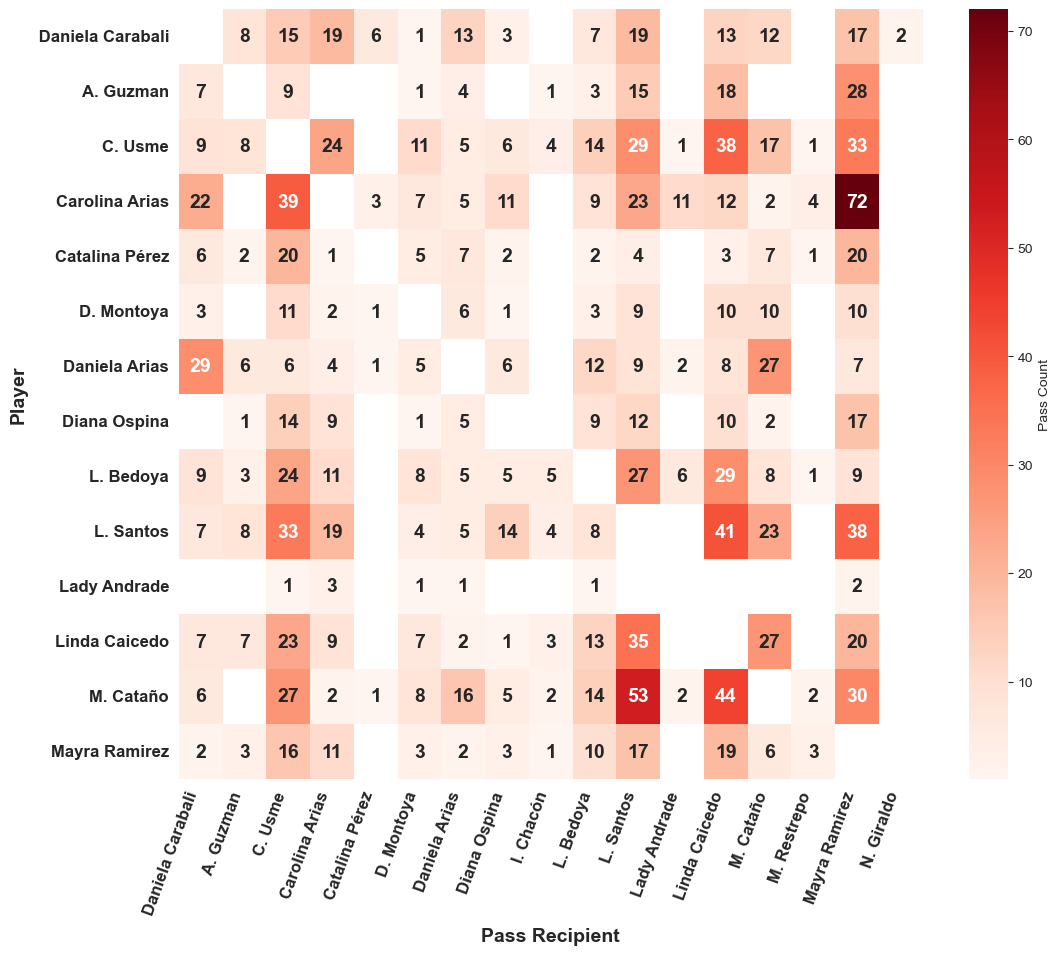

In [217]:
# Pivot the DataFrame to get it in the right format for a heatmap
heatmap_data = pb.pivot(index='player', columns='pass_recipient', values='count')

# Set up the heatmap
plt.figure(figsize=(12, 10))
heatmap=sns.heatmap(heatmap_data, cmap='Reds', annot=True, cbar_kws={'label': 'Pass Count'},
                    annot_kws={"size": 14, "weight": "bold"})  # Adjust the font size)

# Customize the plot
plt.xlabel("Pass Recipient", size=14,weight='bold')
plt.ylabel("Player",size=14,weight='bold')

# Rotate the x-axis labels by 70 degrees
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=70, ha='right', size=12,weight='bold')
heatmap.set_yticklabels(heatmap.get_yticklabels(), ha='right', size=12,weight='bold')

# Save the figure as an SVG image
plt.savefig('Passing heatmap Colombia.svg', format='svg', dpi=200, transparent=True)
# Show the plot
plt.show()

In [218]:
# Find the row with the highest 'count' for each player
max_count_passes = pb.groupby('player')['count'].idxmax()

# Use the row indices to get the corresponding 'pass_recipient' values
result = pb.loc[max_count_passes, ['player', 'pass_recipient', 'count']]
result=result.sort_values(by='count', ascending=False)
result.style.background_gradient(cmap='Reds')

,player,pass_recipient,count
21,Carolina Arias,Mayra Ramirez,72
134,M. Cataño,L. Santos,53
95,L. Santos,Linda Caicedo,41
149,C. Usme,Linda Caicedo,38
107,Linda Caicedo,L. Santos,35
40,Daniela Arias,Daniela Carabali,29
121,L. Bedoya,Linda Caicedo,29
8,A. Guzman,Mayra Ramirez,28
33,Catalina Pérez,C. Usme,20
70,Daniela Carabali,Carolina Arias,19


## Sankey diagram

In [219]:
import dataframe_image as dfi
import plotly.graph_objects as go
import networkx as nx

In [220]:
# Extract players and pass recipients
players = list(set(result['player'].tolist() + result['pass_recipient'].tolist()))

# Create a list of node labels
node_labels = players

# Create source and target indices for the Sankey diagram
sources = [players.index(player) for player in result['player']]
targets = [players.index(recipient) for recipient in result['pass_recipient']]

# Define a list of colors for each link (change or expand as needed)
link_colors = ['cornflowerblue', 'green', 'skyblue', 'purple', 'orange', 'pink', 'brown',
               'gold', 'cyan', 'magenta','salmon', 'indigo', 'cyan', 'olive']

# Create a Sankey diagram trace
sankey_trace = go.Sankey(
    node=dict(
        pad=15,
        thickness=40,
        line=dict(color="black", width=0.1),
        label=node_labels
    ),
    link=dict(
        source=sources,
        target=targets,
        value=result['count'],
        color=[link_colors[i % len(link_colors)] for i in range(len(result))]  # Assign colors to links
    )
)

# Set layout
layout = go.Layout(title="Player Pass Distribution Sankey Diagram")

# Create figure
fig = go.Figure(data=[sankey_trace], layout=layout)
fig.show()

# Set layout with the desired background color
layout = go.Layout(
    title="Player Pass Distribution Sankey Diagram",
    paper_bgcolor='#F4EDF0',  # Set background color
)

# Save the figure as an SVG image
fig.write_image("sankey_diagram.svg", format="svg", scale=2)


## Node pases by only starting eleven

In [221]:
avg_location

,position,x,y,count
player,,,,
Ana María Guzmán Zapata,Left Back,52.148800,36.735200,250
Carolina Arias Vidal,Right Back,58.381717,69.469157,629
Catalina Pérez Jaramillo,Goalkeeper,8.464651,40.820930,215
Daniela Alexandra Árias Rojas,Left Center Back,35.386469,28.510994,473
Daniela Montoya Quiróz,Center Attacking Midfield,57.835390,38.321429,308
Diana Carolina Ospina García Pineda,Right Defensive Midfield,54.361310,47.264286,336
Jorelyn Andrea Daniela Carabalí Martínez,Right Center Back,37.454963,53.954596,544
Lady Patricia Andrade Rodríguez,Right Wing,56.920690,58.150575,87
Leicy Maria Santos Herrera,Center Attacking Midfield,69.045632,37.906578,973


In [222]:
np = pb_players[pb_players['player'].isin(initial_formation_list)]
np

,player,pass_recipient,x,y,x_end,y_end,id
19,Leicy Maria Santos Herrera,Mayra Tatiana Ramírez Ramírez,29.5,67.8,26.8,76.5,2
20,Mayra Tatiana Ramírez Ramírez,Carolina Arias Vidal,26.8,76.5,19.2,70.7,3
21,Carolina Arias Vidal,Leicy Maria Santos Herrera,24.0,71.8,35.7,71.8,4
22,Leicy Maria Santos Herrera,Carolina Arias Vidal,35.1,71.8,24.0,69.3,5
23,Carolina Arias Vidal,Jorelyn Andrea Daniela Carabalí Martínez,24.0,69.3,10.8,65.4,6
...,...,...,...,...,...,...,...
14495,Jorelyn Andrea Daniela Carabalí Martínez,NaN,27.0,58.5,30.9,79.7,1939
14499,Catalina Pérez Jaramillo,María Catalina Usme Pineda,6.0,36.0,73.9,20.0,1940
14504,Catalina Pérez Jaramillo,Mayra Tatiana Ramírez Ramírez,15.5,53.4,74.3,60.5,1941
14505,María Catalina Usme Pineda,Diana Carolina Ospina García Pineda,100.4,34.6,119.8,23.0,1942


In [223]:
node_p=np.merge(avg_location, left_on='player',right_on='player')
node_p

,player,pass_recipient,x_x,y_x,x_end,y_end,id,position,x_y,y_y,count
0,Leicy Maria Santos Herrera,Mayra Tatiana Ramírez Ramírez,29.5,67.8,26.8,76.5,2,Center Attacking Midfield,69.045632,37.906578,973
1,Leicy Maria Santos Herrera,Carolina Arias Vidal,35.1,71.8,24.0,69.3,5,Center Attacking Midfield,69.045632,37.906578,973
2,Leicy Maria Santos Herrera,Linda Lizeth Caicedo Alegría,62.0,25.4,63.6,14.0,12,Center Attacking Midfield,69.045632,37.906578,973
3,Leicy Maria Santos Herrera,Ana María Guzmán Zapata,58.0,14.0,58.4,1.2,13,Center Attacking Midfield,69.045632,37.906578,973
4,Leicy Maria Santos Herrera,Mayra Tatiana Ramírez Ramírez,93.5,70.5,101.4,77.7,37,Center Attacking Midfield,69.045632,37.906578,973
...,...,...,...,...,...,...,...,...,...,...,...
1750,Manuela Vanegas Cataño,María Catalina Usme Pineda,15.5,3.6,57.2,12.6,1869,Left Back,50.787633,12.376064,752
1751,Manuela Vanegas Cataño,Mayra Tatiana Ramírez Ramírez,71.7,0.1,95.7,5.5,1887,Left Back,50.787633,12.376064,752
1752,Manuela Vanegas Cataño,Mayra Tatiana Ramírez Ramírez,66.4,41.2,88.4,45.1,1914,Left Back,50.787633,12.376064,752
1753,Manuela Vanegas Cataño,Marcela Restrepo Valencia,26.6,35.4,34.5,44.9,1923,Left Back,50.787633,12.376064,752


In [224]:
node_p.player.value_counts()

Manuela Vanegas Cataño                      231
Carolina Arias Vidal                        229
Leicy Maria Santos Herrera                  216
María Catalina Usme Pineda                  215
Lorena Bedoya Durango                       159
Linda Lizeth Caicedo Alegría                158
Jorelyn Andrea Daniela Carabalí Martínez    153
Daniela Alexandra Árias Rojas               127
Mayra Tatiana Ramírez Ramírez               109
Catalina Pérez Jaramillo                     87
Daniela Montoya Quiróz                       71
Name: player, dtype: int64

In [225]:
player_name= {'Manuela Vanegas Cataño': 'M. Cataño', 'Carolina Arias Vidal':'Carolina Arias',
             'Leicy Maria Santos Herrera':'L. Santos', 'María Catalina Usme Pineda':'C. Usme',
              'Lorena Bedoya Durango':'L. Bedoya', 'Linda Lizeth Caicedo Alegría':'Linda Caicedo',
              'Jorelyn Andrea Daniela Carabalí Martínez':' Daniela Carabali', 'Daniela Alexandra Árias Rojas': 'Daniela Arias',
              'Mayra Tatiana Ramírez Ramírez':'Mayra Ramirez', 'Catalina Pérez Jaramillo':'Catalina Pérez',
              'Daniela Montoya Quiróz':'D. Montoya'
             }

In [226]:
node_p.player=node_p.player.replace(player_name)
node_p['pass_recipient']=node_p.pass_recipient.replace(player_name)

## Passes completed only

In [227]:
p_compl = locationcol[locationcol['pass_recipient'].notna()]
p_compl.columns

Index(['ball_receipt_outcome', 'counterpress', 'dribble_outcome',
       'duel_outcome', 'duel_type', 'interception_outcome', 'minute', 'second',
       'pass_cross', 'pass_goal_assist', 'pass_length', 'pass_outcome',
       'pass_recipient', 'pass_shot_assist', 'pass_through_ball', 'pass_type',
       'period', 'play_pattern', 'player', 'player_id', 'position',
       'possession_team', 'team', 'shot_end_location', 'type', 'shot_outcome',
       'substitution_replacement', 'tactics', 'under_pressure',
       'pass_cut_back', 'block_deflection', 'x', 'y', 'x_end', 'y_end'],
      dtype='object')

In [228]:
p_compl=p_compl[['player', 'pass_recipient', 'type', 'x', 'y', 'x_end', 'y_end','type','pass_outcome','pass_type']]
p_compl

,player,pass_recipient,type,x,y,x_end,y_end,type,pass_outcome,pass_type
18,Diana Carolina Ospina García Pineda,Leicy Maria Santos Herrera,Pass,17.3,64.6,30.4,67.8,Pass,NaN,NaN
19,Leicy Maria Santos Herrera,Mayra Tatiana Ramírez Ramírez,Pass,29.5,67.8,26.8,76.5,Pass,NaN,NaN
20,Mayra Tatiana Ramírez Ramírez,Carolina Arias Vidal,Pass,26.8,76.5,19.2,70.7,Pass,NaN,NaN
21,Carolina Arias Vidal,Leicy Maria Santos Herrera,Pass,24.0,71.8,35.7,71.8,Pass,NaN,NaN
22,Leicy Maria Santos Herrera,Carolina Arias Vidal,Pass,35.1,71.8,24.0,69.3,Pass,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
14499,Catalina Pérez Jaramillo,María Catalina Usme Pineda,Pass,6.0,36.0,73.9,20.0,Pass,Incomplete,Goal Kick
14504,Catalina Pérez Jaramillo,Mayra Tatiana Ramírez Ramírez,Pass,15.5,53.4,74.3,60.5,Pass,NaN,NaN
14505,María Catalina Usme Pineda,Diana Carolina Ospina García Pineda,Pass,100.4,34.6,119.8,23.0,Pass,Out,NaN
14508,Daniela Alexandra Árias Rojas,Diana Carolina Ospina García Pineda,Pass,50.8,24.1,56.1,21.5,Pass,NaN,Recovery


In [229]:
p_compl=p_compl[p_compl.pass_outcome.isna()]
p_compl

,player,pass_recipient,type,x,y,x_end,y_end,type,pass_outcome,pass_type
18,Diana Carolina Ospina García Pineda,Leicy Maria Santos Herrera,Pass,17.3,64.6,30.4,67.8,Pass,NaN,NaN
19,Leicy Maria Santos Herrera,Mayra Tatiana Ramírez Ramírez,Pass,29.5,67.8,26.8,76.5,Pass,NaN,NaN
20,Mayra Tatiana Ramírez Ramírez,Carolina Arias Vidal,Pass,26.8,76.5,19.2,70.7,Pass,NaN,NaN
21,Carolina Arias Vidal,Leicy Maria Santos Herrera,Pass,24.0,71.8,35.7,71.8,Pass,NaN,NaN
22,Leicy Maria Santos Herrera,Carolina Arias Vidal,Pass,35.1,71.8,24.0,69.3,Pass,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
14490,Lorena Bedoya Durango,Marcela Restrepo Valencia,Pass,86.3,51.5,89.9,48.7,Pass,NaN,NaN
14494,Carolina Arias Vidal,Jorelyn Andrea Daniela Carabalí Martínez,Pass,39.4,56.6,30.9,57.0,Pass,NaN,NaN
14504,Catalina Pérez Jaramillo,Mayra Tatiana Ramírez Ramírez,Pass,15.5,53.4,74.3,60.5,Pass,NaN,NaN
14508,Daniela Alexandra Árias Rojas,Diana Carolina Ospina García Pineda,Pass,50.8,24.1,56.1,21.5,Pass,NaN,Recovery


In [230]:
avg_location=p_compl.groupby('player').agg({'x':['mean'],'y':['mean','count']})
avg_location.columns=['x','y','count']
avg_location.reset_index(inplace=True)
avg_location

,player,x,y,count
0,Ana María Guzmán Zapata,57.744262,30.437705,61
1,Carolina Arias Vidal,60.463030,71.877576,165
2,Catalina Pérez Jaramillo,12.559091,41.413636,44
3,Daniela Alexandra Árias Rojas,38.010417,29.294792,96
4,Daniela Montoya Quiróz,58.052000,34.812000,50
5,Diana Carolina Ospina García Pineda,53.371930,45.800000,57
6,Jorelyn Andrea Daniela Carabalí Martínez,38.788571,55.008571,105
7,Lady Patricia Andrade Rodríguez,65.500000,59.200000,9
8,Leicy Maria Santos Herrera,68.266242,37.705732,157
9,Linda Lizeth Caicedo Alegría,71.069767,28.155039,129


In [231]:
passes_between_players = p_compl.groupby(['player', 'pass_recipient']).size()
passes_between_players

player                         pass_recipient                          
Ana María Guzmán Zapata        Daniela Alexandra Árias Rojas                4
                               Daniela Montoya Quiróz                       1
                               Ivonne Chacón                                1
                               Jorelyn Andrea Daniela Carabalí Martínez     6
                               Leicy Maria Santos Herrera                  11
                                                                           ..
Mayra Tatiana Ramírez Ramírez  Linda Lizeth Caicedo Alegría                14
                               Lorena Bedoya Durango                        9
                               Manuela Vanegas Cataño                       5
                               Marcela Restrepo Valencia                    2
                               María Catalina Usme Pineda                  15
Length: 160, dtype: int64

In [232]:
passes_between_players_df = passes_between_players.reset_index(name='pass_count')
passes_between_players_df

,player,pass_recipient,pass_count
0,Ana María Guzmán Zapata,Daniela Alexandra Árias Rojas,4
1,Ana María Guzmán Zapata,Daniela Montoya Quiróz,1
2,Ana María Guzmán Zapata,Ivonne Chacón,1
3,Ana María Guzmán Zapata,Jorelyn Andrea Daniela Carabalí Martínez,6
4,Ana María Guzmán Zapata,Leicy Maria Santos Herrera,11
...,...,...,...
155,Mayra Tatiana Ramírez Ramírez,Linda Lizeth Caicedo Alegría,14
156,Mayra Tatiana Ramírez Ramírez,Lorena Bedoya Durango,9
157,Mayra Tatiana Ramírez Ramírez,Manuela Vanegas Cataño,5
158,Mayra Tatiana Ramírez Ramírez,Marcela Restrepo Valencia,2


In [233]:
#merge location and number of passes
merge_np=pd.merge(passes_between_players_df, avg_location, on='player')

In [234]:
merge_np

,player,pass_recipient,pass_count,x,y,count
0,Ana María Guzmán Zapata,Daniela Alexandra Árias Rojas,4,57.744262,30.437705,61
1,Ana María Guzmán Zapata,Daniela Montoya Quiróz,1,57.744262,30.437705,61
2,Ana María Guzmán Zapata,Ivonne Chacón,1,57.744262,30.437705,61
3,Ana María Guzmán Zapata,Jorelyn Andrea Daniela Carabalí Martínez,6,57.744262,30.437705,61
4,Ana María Guzmán Zapata,Leicy Maria Santos Herrera,11,57.744262,30.437705,61
...,...,...,...,...,...,...
155,Mayra Tatiana Ramírez Ramírez,Linda Lizeth Caicedo Alegría,14,74.283951,50.329630,81
156,Mayra Tatiana Ramírez Ramírez,Lorena Bedoya Durango,9,74.283951,50.329630,81
157,Mayra Tatiana Ramírez Ramírez,Manuela Vanegas Cataño,5,74.283951,50.329630,81
158,Mayra Tatiana Ramírez Ramírez,Marcela Restrepo Valencia,2,74.283951,50.329630,81


In [235]:
merge_np=pd.merge(merge_np, avg_location, left_on='pass_recipient', right_on='player', suffixes=['','_end'])
merge_np[['x', 'y', 'x_end', 'y_end']] = merge_np[['x', 'y', 'x_end', 'y_end']].round(2)
merge_np=merge_np.drop(columns='player_end')
merge_np

,player,pass_recipient,pass_count,x,y,count,x_end,y_end,count_end
0,Ana María Guzmán Zapata,Daniela Alexandra Árias Rojas,4,57.74,30.44,61,38.01,29.29,96
1,Carolina Arias Vidal,Daniela Alexandra Árias Rojas,5,60.46,71.88,165,38.01,29.29,96
2,Catalina Pérez Jaramillo,Daniela Alexandra Árias Rojas,7,12.56,41.41,44,38.01,29.29,96
3,Daniela Montoya Quiróz,Daniela Alexandra Árias Rojas,6,58.05,34.81,50,38.01,29.29,96
4,Diana Carolina Ospina García Pineda,Daniela Alexandra Árias Rojas,4,53.37,45.80,57,38.01,29.29,96
...,...,...,...,...,...,...,...,...,...
142,Linda Lizeth Caicedo Alegría,Carolina Arias Vidal,7,71.07,28.16,129,60.46,71.88,165
143,Lorena Bedoya Durango,Carolina Arias Vidal,10,56.97,37.13,109,60.46,71.88,165
144,Manuela Vanegas Cataño,Carolina Arias Vidal,2,54.66,10.38,167,60.46,71.88,165
145,María Catalina Usme Pineda,Carolina Arias Vidal,23,68.50,45.89,148,60.46,71.88,165


In [236]:
merge_np=merge_np[(merge_np.player.isin(initial_formation_list)) & (merge_np.pass_recipient.isin(initial_formation_list))]

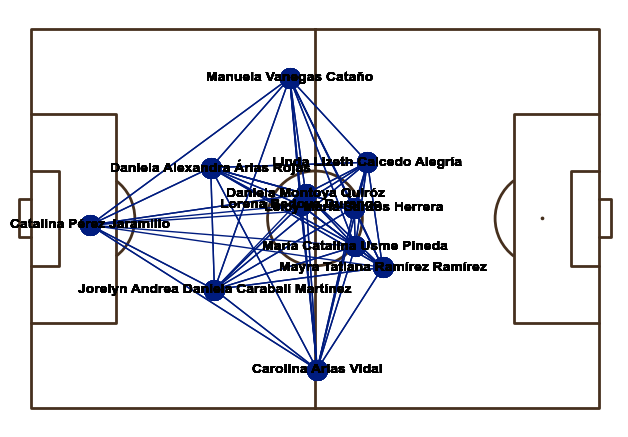

In [237]:
pitch=Pitch(pitch_type='statsbomb',line_color='#46301E', goal_type='box')

fig,ax=pitch.draw()
scatter=pitch.scatter(x=merge_np.x,y=merge_np.y,s=200, ax=ax)


#annotating player name
for i, row in merge_np.iterrows():
    pitch.annotate(row.player, xy=(row.x, row.y),
                   c='black', va='center', ha='center', weight = "bold", size=10, ax=ax, zorder = 4)
    
lines=pitch.lines(merge_np.x,merge_np.y,
                 merge_np.x_end,merge_np.y_end, ax=ax, linewidth=1)

In [238]:
max_line_width=7
max_marker_size=3000
merge_np['width'] = (merge_np['pass_count']/merge_np['pass_count'].max()*max_line_width)

C:\Users\Interventoria\AppData\Local\Temp\ipykernel_7648\1085945895.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [239]:
import numpy as np

In [240]:
from matplotlib.colors import to_rgba
min_transparency=0.8
color=np.array(to_rgba('#3724e0'))
color=np.tile(color,(len(merge_np),1))
c_trasnparency=merge_np['pass_count'] / merge_np['pass_count'].max()
c_trasnparency=(c_trasnparency*(1-min_transparency))+min_transparency
color[:,3]=c_trasnparency

In [241]:
merge_np.player=merge_np.player.replace(player_name)
merge_np['pass_recipient']=merge_np.pass_recipient.replace(player_name)

C:\Users\Interventoria\AppData\Local\Temp\ipykernel_7648\1592812947.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Interventoria\AppData\Local\Temp\ipykernel_7648\1592812947.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [242]:
new_directory = r"C:\Users\Interventoria\Desktop\Daniel cursos\Data_Analyst\Python\Soccer analysis\FWCcol2023"
os.chdir(new_directory)
os.listdir()

['2023.png',
 'Colombia FWC 2023.png',
 'escudoteca.com',
 'Formation Colombia.svg',
 'Linda Caicedo Colombia.svg',
 'Pass location Colombia.svg',
 'Pass location2 Colombia.svg',
 'Pass Network Colombia.svg',
 'Passes in to Final third Colombia.svg',
 'Passing heatmap Colombia.svg',
 'Pressure zone Colombia.svg',
 'result_table.png',
 'sankey_diagram.png',
 'sankey_diagram.svg',
 'Shoting zone Colombia.svg']

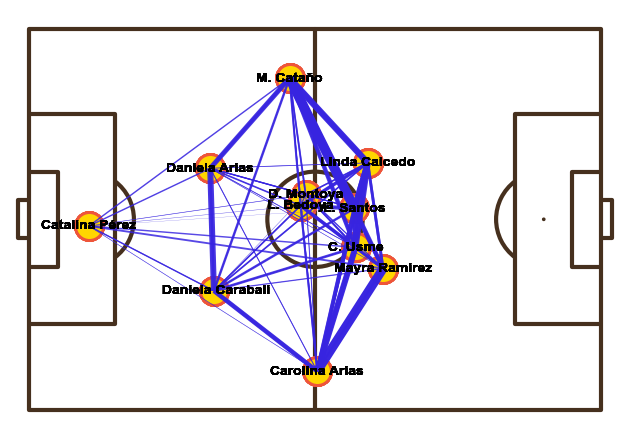

In [243]:
pitch=Pitch(pitch_type='statsbomb',line_color='#46301E', goal_type='box',linewidth=3)

fig,ax=pitch.draw()
scatter=pitch.scatter(x=merge_np.x,y=merge_np.y,s=400, ax=ax, color='#FFD600', edgecolors='#EE553A',linewidths=2 )

# annotating player name**
for i, row in merge_np.iterrows():
    pitch.annotate(row.player, xy=(row.x, row.y),
                   c='black', va='center', ha='center', size=10, ax=ax, zorder=4, weight='bold')

    
lines=pitch.lines(merge_np.x,merge_np.y,
                 merge_np.x_end,merge_np.y_end, ax=ax,
                  lw=merge_np['width'], color=color)
#plt.title('Pass Network Colombia');
fig.savefig('Pass Network Colombia.svg', format='svg', dpi=200, transparent=True)

## Posession Location

In [244]:
List_col=['team','possession_team']

Colombia_df=col[(col.team=="Colombia Women's") | (col.possession_team=="Colombia Women's")]
Colombia_df

,50_50,ball_receipt_outcome,ball_recovery_recovery_failure,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_other,...,shot_aerial_won,bad_behaviour_card,block_deflection,foul_committed_penalty,foul_committed_type,foul_won_penalty,goalkeeper_punched_out,ball_recovery_offensive,goalkeeper_shot_saved_off_target,shot_saved_off_target
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16859,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16860,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16861,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [245]:
Colombia_df.type.unique()

array(['Starting XI', 'Half Start', 'Pass', 'Ball Receipt*', 'Carry',
       'Pressure', 'Block', 'Ball Recovery', 'Dribbled Past', 'Dribble',
       'Shot', 'Goal Keeper', 'Duel', 'Dispossessed', 'Clearance',
       'Miscontrol', 'Injury Stoppage', 'Player Off', 'Player On',
       'Shield', 'Interception', 'Tactical Shift', 'Foul Committed',
       'Foul Won', '50/50', 'Referee Ball-Drop', 'Half End',
       'Substitution', 'Error'], dtype=object)

In [246]:
desired_event_types = ['Pass', 'Ball Receipt', 'Carry', 'Ball Recovery', 'Dribbled Past', 'Dribble', 'Interception','Shot']
team_events = Colombia_df[Colombia_df['type'].isin(desired_event_types)]
pos = team_events[team_events.possession_team== "Colombia Women's"]
pos

,50_50,ball_receipt_outcome,ball_recovery_recovery_failure,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_other,...,shot_aerial_won,bad_behaviour_card,block_deflection,foul_committed_penalty,foul_committed_type,foul_won_penalty,goalkeeper_punched_out,ball_recovery_offensive,goalkeeper_shot_saved_off_target,shot_saved_off_target
18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [247]:
pos=pos[pos.team== "Colombia Women's"]
pos

,50_50,ball_receipt_outcome,ball_recovery_recovery_failure,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_other,...,shot_aerial_won,bad_behaviour_card,block_deflection,foul_committed_penalty,foul_committed_type,foul_won_penalty,goalkeeper_punched_out,ball_recovery_offensive,goalkeeper_shot_saved_off_target,shot_saved_off_target
18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [248]:
list_location = ['player', 'carry_end_location', 'location', 'pass_end_location']
possession=pos[list_location]
possession

,player,carry_end_location,location,pass_end_location
18,Diana Carolina Ospina García Pineda,NaN,"[17.3, 64.6]","[30.4, 67.8]"
19,Leicy Maria Santos Herrera,NaN,"[29.5, 67.8]","[26.8, 76.5]"
20,Mayra Tatiana Ramírez Ramírez,NaN,"[26.8, 76.5]","[19.2, 70.7]"
21,Carolina Arias Vidal,NaN,"[24.0, 71.8]","[35.7, 71.8]"
22,Leicy Maria Santos Herrera,NaN,"[35.1, 71.8]","[24.0, 69.3]"
...,...,...,...,...
16735,Manuela Vanegas Cataño,NaN,"[108.9, 39.5]",NaN
16736,Linda Lizeth Caicedo Alegría,NaN,"[99.1, 36.1]",NaN
16737,Jorelyn Andrea Daniela Carabalí Martínez,NaN,"[114.7, 31.5]",NaN
16738,María Catalina Usme Pineda,NaN,"[91.3, 56.8]",NaN


In [249]:
carrydf = possession[possession['carry_end_location'].notna()]
initiallocationdf=possession[possession['location'].notna()]
pass_end_loc=possession[possession['pass_end_location'].notna()]

In [250]:
carrydf=carrydf[['player','carry_end_location']]
initiallocationdf=initiallocationdf[['player','location']]
pass_end_loc=pass_end_loc[['player','pass_end_location']]
carrydf

,player,carry_end_location
1468,Diana Carolina Ospina García Pineda,"[17.3, 64.6]"
1469,Leicy Maria Santos Herrera,"[29.5, 67.8]"
1470,Mayra Tatiana Ramírez Ramírez,"[26.8, 76.5]"
1471,Carolina Arias Vidal,"[24.0, 71.8]"
1472,Leicy Maria Santos Herrera,"[35.1, 71.8]"
...,...,...
15674,Mayra Tatiana Ramírez Ramírez,"[96.1, 49.5]"
15682,Catalina Pérez Jaramillo,"[15.5, 53.4]"
15683,Mayra Tatiana Ramírez Ramírez,"[74.3, 57.9]"
15685,María Catalina Usme Pineda,"[100.4, 34.6]"


In [251]:
#transform vector on x and y 
carrydf[['x','y']]=carrydf.carry_end_location.apply(pd.Series)
initiallocationdf[['x','y']]=initiallocationdf.location.apply(pd.Series)
pass_end_loc[['x','y']]=pass_end_loc.pass_end_location.apply(pd.Series)

In [252]:
carrydf=carrydf[['player','x','y']]
initiallocationdf=initiallocationdf[['player','x','y']]
pass_end_loc=pass_end_loc[['player','x','y']]
pass_end_loc

,player,x,y
18,Diana Carolina Ospina García Pineda,30.4,67.8
19,Leicy Maria Santos Herrera,26.8,76.5
20,Mayra Tatiana Ramírez Ramírez,19.2,70.7
21,Carolina Arias Vidal,35.7,71.8
22,Leicy Maria Santos Herrera,24.0,69.3
...,...,...,...
14499,Catalina Pérez Jaramillo,73.9,20.0
14504,Catalina Pérez Jaramillo,74.3,60.5
14505,María Catalina Usme Pineda,119.8,23.0
14508,Daniela Alexandra Árias Rojas,56.1,21.5


In [253]:
#concat x and y values from this point player is not neccesary

concate=pd.concat([initiallocationdf, pass_end_loc,carrydf ], axis=0)  # Concatenate vertically
concate

,player,x,y
18,Diana Carolina Ospina García Pineda,17.3,64.6
19,Leicy Maria Santos Herrera,29.5,67.8
20,Mayra Tatiana Ramírez Ramírez,26.8,76.5
21,Carolina Arias Vidal,24.0,71.8
22,Leicy Maria Santos Herrera,35.1,71.8
...,...,...,...
15674,Mayra Tatiana Ramírez Ramírez,96.1,49.5
15682,Catalina Pérez Jaramillo,15.5,53.4
15683,Mayra Tatiana Ramírez Ramírez,74.3,57.9
15685,María Catalina Usme Pineda,100.4,34.6


In [254]:
## Add stroke
from matplotlib.patheffects import withStroke

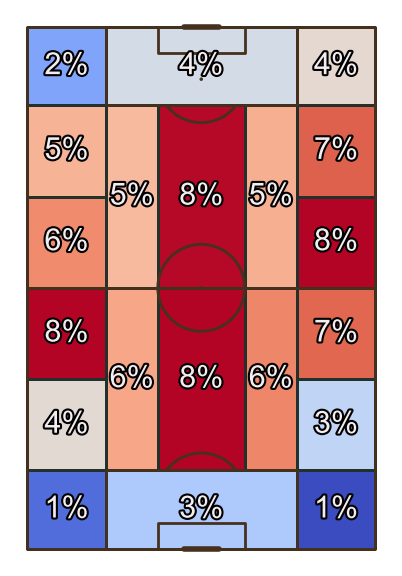

In [255]:
# setup pitch
pitch = VerticalPitch(pitch_type='statsbomb', line_zorder=2,
                      line_color='#46301E')
# draw
fig, ax = pitch.draw(figsize=(4.125, 6))
bin_statistic = pitch.bin_statistic_positional(concate.x, concate.y, statistic='count',
                                               positional='full', normalize=True)
pitch.heatmap_positional(bin_statistic, ax=ax, cmap='coolwarm', edgecolors='#22312b')
labels = pitch.label_heatmap(bin_statistic, color='#f4edf0', fontsize=22,
                            ax=ax, ha='center', va='center',
                             str_format='{:.0%}', path_effects=[withStroke(linewidth=3, foreground='black')])

fig.savefig('Pass location Colombia.svg', format='svg', dpi=700, transparent=True)

In [256]:
import matplotlib.patheffects as path_effects

In [257]:
# path effects
path_eff = [path_effects.Stroke(linewidth=1.5, foreground='black'),
            path_effects.Normal()]

In [258]:
## Add stroke
from matplotlib.patheffects import withStroke

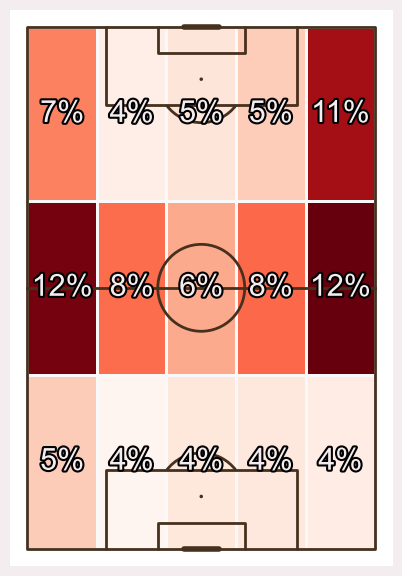

In [259]:
pitch = VerticalPitch(pitch_type='statsbomb', line_zorder=2,
                      line_color='#46301E')
fig, ax = pitch.draw(figsize=(4.125, 6))

fig.set_facecolor('#f4edf0')
bin_statistic = pitch.bin_statistic(concate.x, concate.y, statistic='count', bins=(3,5), normalize=True)
pitch.heatmap(bin_statistic,ax=ax, cmap='Reds', edgecolor='#f9f9f9')
## Add stroke to numbers ()
labels = pitch.label_heatmap(bin_statistic, color='#f4edf0', fontsize=22,
                            ax=ax, ha='center', va='center',
                             str_format='{:.0%}', path_effects=[withStroke(linewidth=3, foreground='black')])

fig.savefig('Pass location2 Colombia.svg', format='svg', dpi=700, transparent=True)

## Pressure zones

In [260]:
pressure=Colombia_df[Colombia_df.type=='Pressure'][['player', 'team', 'possession_team','location','counterpress', 'under_pressure','minute','second']]
pressure

,player,team,possession_team,location,counterpress,under_pressure,minute,second
2014,Ana María Guzmán Zapata,Colombia Women's,Jamaica Women's,"[41.2, 6.3]",NaN,NaN,0,8
2015,Leicy Maria Santos Herrera,Colombia Women's,Jamaica Women's,"[63.4, 62.7]",NaN,NaN,0,29
2016,Diana Carolina Ospina García Pineda,Colombia Women's,Jamaica Women's,"[41.1, 62.7]",NaN,NaN,0,31
2017,Diana Carolina Ospina García Pineda,Colombia Women's,Jamaica Women's,"[33.4, 53.3]",NaN,NaN,0,34
2018,Drew Spence,Jamaica Women's,Colombia Women's,"[84.4, 8.3]",NaN,NaN,0,47
...,...,...,...,...,...,...,...,...
16150,María Catalina Usme Pineda,Colombia Women's,Colombia Women's,"[80.5, 51.7]",True,NaN,94,13
16151,Diana Carolina Ospina García Pineda,Colombia Women's,Colombia Women's,"[62.5, 32.7]",NaN,NaN,94,19
16152,Diana Carolina Ospina García Pineda,Colombia Women's,Colombia Women's,"[114.1, 22.2]",NaN,NaN,94,28
16153,Geum-Min Lee,Korea Republic Women's,Colombia Women's,"[62.7, 61.3]",True,NaN,94,47


In [261]:
#todo lo que tenga posesion diferente a Colombia es zona de presion
col_pressure=pressure[(pressure.possession_team!="Colombia Women's")]
col_pressure

,player,team,possession_team,location,counterpress,under_pressure,minute,second
2014,Ana María Guzmán Zapata,Colombia Women's,Jamaica Women's,"[41.2, 6.3]",NaN,NaN,0,8
2015,Leicy Maria Santos Herrera,Colombia Women's,Jamaica Women's,"[63.4, 62.7]",NaN,NaN,0,29
2016,Diana Carolina Ospina García Pineda,Colombia Women's,Jamaica Women's,"[41.1, 62.7]",NaN,NaN,0,31
2017,Diana Carolina Ospina García Pineda,Colombia Women's,Jamaica Women's,"[33.4, 53.3]",NaN,NaN,0,34
2022,Jorelyn Andrea Daniela Carabalí Martínez,Colombia Women's,Jamaica Women's,"[7.6, 53.5]",NaN,NaN,2,9
...,...,...,...,...,...,...,...,...
16132,Lorena Bedoya Durango,Colombia Women's,Korea Republic Women's,"[16.1, 66.5]",NaN,NaN,90,55
16142,Marcela Restrepo Valencia,Colombia Women's,Korea Republic Women's,"[38.6, 67.1]",NaN,NaN,92,49
16143,Carolina Arias Vidal,Colombia Women's,Korea Republic Women's,"[49.3, 64.5]",NaN,NaN,93,32
16144,Marcela Restrepo Valencia,Colombia Women's,Korea Republic Women's,"[44.8, 66.5]",NaN,NaN,93,43


In [262]:
col_pressure[['x','y']]=col_pressure.location.apply(pd.Series)
col_pressure=col_pressure[['player','team','possession_team','x','y','minute','second']]
col_pressure

C:\Users\Interventoria\AppData\Local\Temp\ipykernel_7648\793320476.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Interventoria\AppData\Local\Temp\ipykernel_7648\793320476.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,player,team,possession_team,x,y,minute,second
2014,Ana María Guzmán Zapata,Colombia Women's,Jamaica Women's,41.2,6.3,0,8
2015,Leicy Maria Santos Herrera,Colombia Women's,Jamaica Women's,63.4,62.7,0,29
2016,Diana Carolina Ospina García Pineda,Colombia Women's,Jamaica Women's,41.1,62.7,0,31
2017,Diana Carolina Ospina García Pineda,Colombia Women's,Jamaica Women's,33.4,53.3,0,34
2022,Jorelyn Andrea Daniela Carabalí Martínez,Colombia Women's,Jamaica Women's,7.6,53.5,2,9
...,...,...,...,...,...,...,...
16132,Lorena Bedoya Durango,Colombia Women's,Korea Republic Women's,16.1,66.5,90,55
16142,Marcela Restrepo Valencia,Colombia Women's,Korea Republic Women's,38.6,67.1,92,49
16143,Carolina Arias Vidal,Colombia Women's,Korea Republic Women's,49.3,64.5,93,32
16144,Marcela Restrepo Valencia,Colombia Women's,Korea Republic Women's,44.8,66.5,93,43


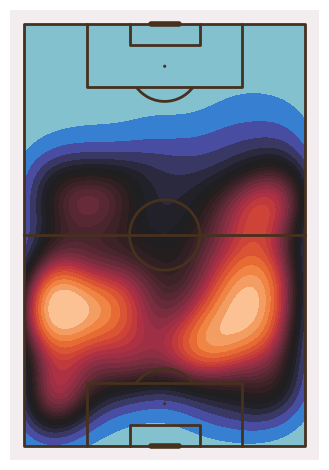

In [263]:
pitch = VerticalPitch(pitch_type='statsbomb', line_zorder=2, pitch_color='#f4edf0',line_color='#46301E')
fig, ax = pitch.draw()

kde=pitch.kdeplot(x=col_pressure.x, y=col_pressure.y, ax=ax,fill=True, levels=25,
                    # shade the lowest area so it looks smooth
                    # so even if there are no events it gets some color
                    shade_lowest=True,
                    cut=4,  # extended the cut so it reaches the bottom edge
                    cmap='icefire')

fig.savefig('Pressure zone Colombia.svg', format='svg', dpi=700, transparent=True)

In [264]:
## Goals conceded 1st half-2td half, open play set pices

In [265]:
Colombia_df[Colombia_df.type=='Shot'].shot_outcome.value_counts()

Off T               20
Blocked             19
Saved               13
Goal                 6
Post                 2
Wayward              2
Saved Off Target     1
Name: shot_outcome, dtype: int64

In [266]:
Col_shots=Colombia_df[Colombia_df.type=='Shot']
Col_shots.columns

Index(['50_50', 'ball_receipt_outcome', 'ball_recovery_recovery_failure',
       'block_offensive', 'carry_end_location', 'clearance_aerial_won',
       'clearance_body_part', 'clearance_head', 'clearance_left_foot',
       'clearance_other',
       ...
       'shot_aerial_won', 'bad_behaviour_card', 'block_deflection',
       'foul_committed_penalty', 'foul_committed_type', 'foul_won_penalty',
       'goalkeeper_punched_out', 'ball_recovery_offensive',
       'goalkeeper_shot_saved_off_target', 'shot_saved_off_target'],
      dtype='object', length=102)

In [267]:
Col_shots=Col_shots[['player','minute','second','location','shot_end_location','shot_outcome','shot_type']]
Col_shots

,player,minute,second,location,shot_end_location,shot_outcome,shot_type
2649,Diana Carolina Ospina García Pineda,14,36,"[108.4, 57.3]","[116.6, 43.6, 0.3]",Saved,Open Play
2650,Daniela Alexandra Árias Rojas,28,36,"[112.4, 44.3]","[113.2, 43.9, 1.5]",Saved,Open Play
2651,Leicy Maria Santos Herrera,30,34,"[87.8, 49.0]","[93.1, 47.2]",Blocked,Open Play
2652,Daniela Alexandra Árias Rojas,37,45,"[105.8, 32.7]","[112.7, 35.4]",Blocked,Open Play
2653,Jorelyn Andrea Daniela Carabalí Martínez,37,47,"[112.6, 37.1]","[120.0, 39.7, 6.0]",Off T,Open Play
...,...,...,...,...,...,...,...
16735,Manuela Vanegas Cataño,78,11,"[108.9, 39.5]","[112.4, 49.1]",Wayward,Open Play
16736,Linda Lizeth Caicedo Alegría,80,31,"[99.1, 36.1]","[100.9, 36.7]",Blocked,Open Play
16737,Jorelyn Andrea Daniela Carabalí Martínez,81,12,"[114.7, 31.5]","[120.0, 33.2, 1.4]",Off T,Open Play
16738,María Catalina Usme Pineda,87,24,"[91.3, 56.8]","[120.0, 43.3, 5.2]",Off T,Open Play


In [268]:
#shots1half=Col_shots[Col_shots.minute<46]
shots1half=Col_shots

In [269]:
shots1half[['x','y']]=shots1half.location.apply(pd.Series)
shots1half[['x_end','y_end','z_end']]=shots1half.shot_end_location.apply(pd.Series)
shots1half=shots1half[['player','minute','second','x','y','x_end','y_end','z_end','shot_outcome','shot_type']]
shots1half['z_end'] = shots1half['z_end'].fillna(0)


C:\Users\Interventoria\AppData\Local\Temp\ipykernel_7648\1612140304.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [270]:
shots1half['z_end'] = shots1half['z_end'].fillna(0)
shots1half

C:\Users\Interventoria\AppData\Local\Temp\ipykernel_7648\324639622.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,player,minute,second,x,y,x_end,y_end,z_end,shot_outcome,shot_type
2649,Diana Carolina Ospina García Pineda,14,36,108.4,57.3,116.6,43.6,0.3,Saved,Open Play
2650,Daniela Alexandra Árias Rojas,28,36,112.4,44.3,113.2,43.9,1.5,Saved,Open Play
2651,Leicy Maria Santos Herrera,30,34,87.8,49.0,93.1,47.2,0.0,Blocked,Open Play
2652,Daniela Alexandra Árias Rojas,37,45,105.8,32.7,112.7,35.4,0.0,Blocked,Open Play
2653,Jorelyn Andrea Daniela Carabalí Martínez,37,47,112.6,37.1,120.0,39.7,6.0,Off T,Open Play
...,...,...,...,...,...,...,...,...,...,...
16735,Manuela Vanegas Cataño,78,11,108.9,39.5,112.4,49.1,0.0,Wayward,Open Play
16736,Linda Lizeth Caicedo Alegría,80,31,99.1,36.1,100.9,36.7,0.0,Blocked,Open Play
16737,Jorelyn Andrea Daniela Carabalí Martínez,81,12,114.7,31.5,120.0,33.2,1.4,Off T,Open Play
16738,María Catalina Usme Pineda,87,24,91.3,56.8,120.0,43.3,5.2,Off T,Open Play


In [271]:
print(dir(pitch.arrows))

['__call__', '__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__func__', '__ge__', '__get__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__self__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__']


In [272]:
shots1half = shots1half.dropna(subset=['shot_outcome'])

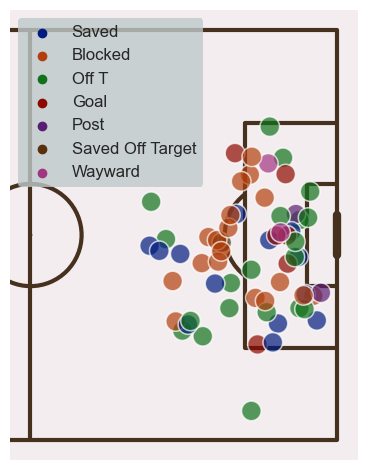

In [273]:
# Plot the pitch
pitch = Pitch(pitch_type='statsbomb', line_zorder=2, pitch_color='#f4edf0',line_color='#46301E', half=True, linewidth=3)
fig, ax = pitch.draw()

# Plot the arrows
#lines = pitch.lines(xstart=shots1half.x, ystart=shots1half.y,
                     #xend=shots1half.x_end, yend=shots1half.y_end, ax=ax,
                      #color='#70FAFF', linewidth=2, comet=True,capstyle='round')
# Set the color palette
sns.set_palette("dark")

sns.scatterplot(data = shots1half, x=shots1half['x'],y= shots1half['y'], s=200,
                zorder=5,alpha=0.7, hue=shots1half.shot_outcome)


# Set up the legend
ax.legend(facecolor='#BFC9CA', handlelength=2, edgecolor='None', fontsize=12, loc='upper left')



plt.show()

fig.savefig('Shoting zone Colombia.svg', format='svg', dpi=100, transparent=True)

In [274]:
shots_on_target = shots1half[shots1half['shot_outcome'].isin(['Saved', 'Goal'])]
shots_on_target

,player,minute,second,x,y,x_end,y_end,z_end,shot_outcome,shot_type
2649,Diana Carolina Ospina García Pineda,14,36,108.4,57.3,116.6,43.6,0.3,Saved,Open Play
2650,Daniela Alexandra Árias Rojas,28,36,112.4,44.3,113.2,43.9,1.5,Saved,Open Play
2657,María Catalina Usme Pineda,50,53,110.3,45.6,120.0,37.1,1.1,Goal,Open Play
6575,Leicy Maria Santos Herrera,43,49,104.4,61.4,120.0,39.7,2.3,Goal,Open Play
6582,Lorena Bedoya Durango,70,15,83.3,42.1,118.4,37.3,2.1,Saved,Open Play
6586,Leicy Maria Santos Herrera,86,26,116.0,56.7,119.4,45.4,0.3,Saved,Open Play
9120,Daniela Montoya Quiróz,19,39,111.0,39.3,111.6,39.5,2.1,Saved,Open Play
9129,Daniela Montoya Quiróz,58,25,113.8,51.6,118.2,43.8,0.2,Saved,Open Play
9131,Mayra Tatiana Ramírez Ramírez,61,56,107.4,61.0,119.2,44.9,0.5,Saved,Open Play
9132,Daniela Alexandra Árias Rojas,71,30,106.7,41.0,118.7,42.2,1.0,Saved,Open Play


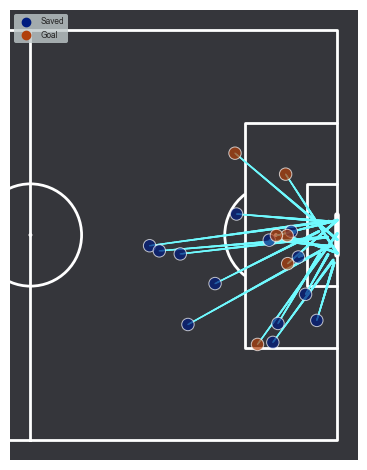

In [275]:
# Plot the pitch
pitch = Pitch(pitch_type='statsbomb', line_zorder=2, line_color='white',
              pitch_color='#35363B', half=True)
fig, ax = pitch.draw()

# Plot the arrows
lines = pitch.lines(xstart=shots_on_target.x, ystart=shots_on_target.y,
                     xend=shots_on_target.x_end, yend=shots_on_target.y_end, ax=ax,
                      color='#70FAFF', linewidth=2, comet=True,capstyle='round')

sns.scatterplot(data = shots_on_target, x=shots_on_target['x'],y= shots_on_target['y'], s=80,
                zorder=5,alpha=0.7, hue=shots_on_target.shot_outcome)


# Set up the legend
ax.legend(facecolor='#BFC9CA', handlelength=2, edgecolor='None', fontsize=6, loc='upper left')

plt.show()


In [276]:
p_compl

,player,pass_recipient,type,x,y,x_end,y_end,type,pass_outcome,pass_type
18,Diana Carolina Ospina García Pineda,Leicy Maria Santos Herrera,Pass,17.3,64.6,30.4,67.8,Pass,NaN,NaN
19,Leicy Maria Santos Herrera,Mayra Tatiana Ramírez Ramírez,Pass,29.5,67.8,26.8,76.5,Pass,NaN,NaN
20,Mayra Tatiana Ramírez Ramírez,Carolina Arias Vidal,Pass,26.8,76.5,19.2,70.7,Pass,NaN,NaN
21,Carolina Arias Vidal,Leicy Maria Santos Herrera,Pass,24.0,71.8,35.7,71.8,Pass,NaN,NaN
22,Leicy Maria Santos Herrera,Carolina Arias Vidal,Pass,35.1,71.8,24.0,69.3,Pass,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
14490,Lorena Bedoya Durango,Marcela Restrepo Valencia,Pass,86.3,51.5,89.9,48.7,Pass,NaN,NaN
14494,Carolina Arias Vidal,Jorelyn Andrea Daniela Carabalí Martínez,Pass,39.4,56.6,30.9,57.0,Pass,NaN,NaN
14504,Catalina Pérez Jaramillo,Mayra Tatiana Ramírez Ramírez,Pass,15.5,53.4,74.3,60.5,Pass,NaN,NaN
14508,Daniela Alexandra Árias Rojas,Diana Carolina Ospina García Pineda,Pass,50.8,24.1,56.1,21.5,Pass,NaN,Recovery


In [277]:
ppasses_final_third=p_compl[(p_compl.x_end>79)]
ppasses_final_third.player.value_counts()

Carolina Arias Vidal                        67
Leicy Maria Santos Herrera                  64
María Catalina Usme Pineda                  64
Linda Lizeth Caicedo Alegría                54
Manuela Vanegas Cataño                      47
Mayra Tatiana Ramírez Ramírez               34
Lorena Bedoya Durango                       32
Ana María Guzmán Zapata                     23
Jorelyn Andrea Daniela Carabalí Martínez    17
Diana Carolina Ospina García Pineda         12
Daniela Montoya Quiróz                      11
Daniela Alexandra Árias Rojas                6
Lady Patricia Andrade Rodríguez              2
Name: player, dtype: int64

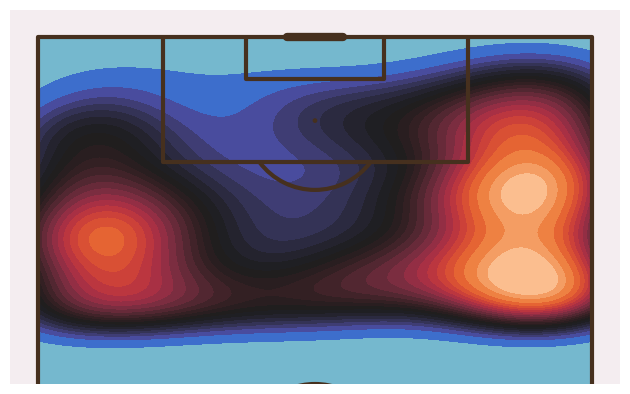

In [278]:
pitch = VerticalPitch(pitch_type='statsbomb', line_zorder=2, linewidth=3,
                      pitch_color='#f4edf0',line_color='#46301E', half=True, pad_bottom=-10)
fig, ax = pitch.draw()

kde=pitch.kdeplot(x=ppasses_final_third.x_end, y=ppasses_final_third.y_end, ax=ax,fill=True, levels=25,
                    # shade the lowest area so it looks smooth
                    # so even if there are no events it gets some color
                    shade_lowest=True,
                    cut=4,  # extended the cut so it reaches the bottom edge
                    cmap='icefire')
fig.savefig('Passes in to Final third Colombia.svg', format='svg', dpi=700)

In [279]:
colgames
#3901832 Jamaica
#3902967 England
#3893834 Morroco
#3893818 Germany
#3893802 Korea


[3901832, 3902967, 3893834, 3893818, 3893802]

In [280]:
matches = sb.events(match_id=3893818)
Colombia_events=matches[matches.team=="Colombia Women's"]
Colombia_passes=Colombia_events[Colombia_events.type=="Pass"]

Colombia_passes=Colombia_passes[['ball_receipt_outcome','location', 'minute', 'second','pass_cross', 'pass_end_location',
           'pass_length','pass_outcome', 'pass_recipient','pass_shot_assist',
           'pass_type','player','possession_team', 'team','type','substitution_replacement']]
Colombia_passes[['x','y']]=Colombia_passes.location.apply(pd.Series)
Colombia_passes[['x_end','y_end']]=Colombia_passes.pass_end_location.apply(pd.Series)
Colombia_passes=Colombia_passes[Colombia_passes.pass_outcome.isna()]

In [281]:
Colombia_events.columns

Index(['50_50', 'ball_receipt_outcome', 'ball_recovery_offensive',
       'ball_recovery_recovery_failure', 'block_offensive',
       'carry_end_location', 'clearance_aerial_won', 'clearance_body_part',
       'clearance_head', 'clearance_left_foot', 'clearance_other',
       'clearance_right_foot', 'counterpress', 'dribble_nutmeg',
       'dribble_outcome', 'dribble_overrun', 'duel_outcome', 'duel_type',
       'duration', 'foul_committed_advantage', 'foul_committed_card',
       'foul_committed_offensive', 'foul_committed_penalty',
       'foul_won_advantage', 'foul_won_defensive', 'foul_won_penalty',
       'goalkeeper_body_part', 'goalkeeper_end_location', 'goalkeeper_outcome',
       'goalkeeper_position', 'goalkeeper_shot_saved_off_target',
       'goalkeeper_technique', 'goalkeeper_type', 'id', 'index',
       'injury_stoppage_in_chain', 'interception_outcome', 'location',
       'match_id', 'minute', 'off_camera', 'out', 'pass_aerial_won',
       'pass_angle', 'pass_assisted_sh

In [282]:
Colombia_shots=Colombia_events[Colombia_events.type=="Shot"]

Colombia_shots=Colombia_shots[['location', 'minute', 'second','shot_outcome', 'shot_end_location','shot_type',
           'player','possession_team','team','type']]
Colombia_shots[['x','y']]=Colombia_shots.location.apply(pd.Series)
Colombia_shots[['x_end','y_end','z_end']]=Colombia_shots.shot_end_location.apply(pd.Series)
Colombia_shots['z_end'] = Colombia_shots['z_end'].fillna(0)
Colombia_shots

,location,minute,second,shot_outcome,shot_end_location,shot_type,player,possession_team,team,type,x,y,x_end,y_end,z_end
3543,"[114.3, 36.6]",7,55,Off T,"[120.0, 35.0, 1.2]",Open Play,Mayra Tatiana Ramírez Ramírez,Colombia Women's,Colombia Women's,Shot,114.3,36.6,120.0,35.0,1.2
3546,"[89.3, 43.7]",27,49,Saved,"[118.1, 40.4, 0.2]",Open Play,Lorena Bedoya Durango,Colombia Women's,Colombia Women's,Shot,89.3,43.7,118.1,40.4,0.2
3548,"[97.4, 41.5]",39,24,Saved Off Target,"[118.3, 35.5, 0.2]",Open Play,Mayra Tatiana Ramírez Ramírez,Colombia Women's,Colombia Women's,Shot,97.4,41.5,118.3,35.5,0.2
3550,"[83.6, 33.5]",43,17,Off T,"[120.0, 39.3, 3.6]",Open Play,Lorena Bedoya Durango,Colombia Women's,Colombia Women's,Shot,83.6,33.5,120.0,39.3,3.6
3553,"[96.5, 41.0]",51,47,Blocked,"[104.2, 41.8]",Open Play,Manuela Vanegas Cataño,Colombia Women's,Colombia Women's,Shot,96.5,41.0,104.2,41.8,0.0
3554,"[109.9, 28.1]",51,53,Goal,"[120.0, 43.6, 2.3]",Open Play,Linda Lizeth Caicedo Alegría,Colombia Women's,Colombia Women's,Shot,109.9,28.1,120.0,43.6,2.3
3562,"[100.3, 35.9]",86,30,Saved,"[118.6, 37.4, 0.5]",Open Play,Leicy Maria Santos Herrera,Colombia Women's,Colombia Women's,Shot,100.3,35.9,118.6,37.4,0.5
3564,"[113.4, 51.8]",95,12,Blocked,"[113.8, 51.2]",Open Play,Mayra Tatiana Ramírez Ramírez,Colombia Women's,Colombia Women's,Shot,113.4,51.8,113.8,51.2,0.0
3565,"[110.2, 40.1]",96,23,Goal,"[120.0, 43.5, 0.8]",Open Play,Manuela Vanegas Cataño,Colombia Women's,Colombia Women's,Shot,110.2,40.1,120.0,43.5,0.8


In [283]:
passes_final_third=Colombia_passes[(Colombia_passes.x_end>79)]

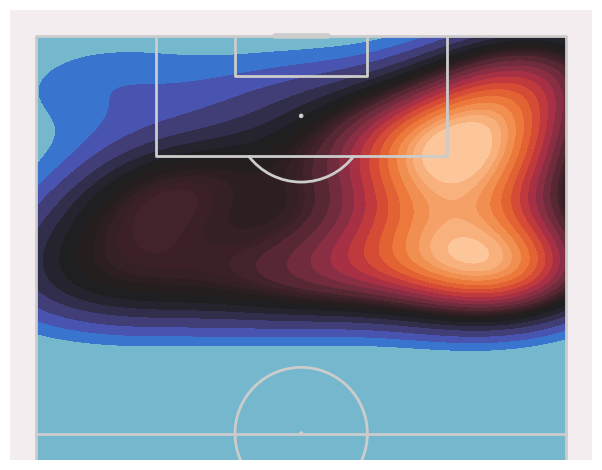

In [284]:
pitch = VerticalPitch(pitch_type='statsbomb', line_zorder=2, pitch_color='#f4edf0', half=True)
fig, ax = pitch.draw()

kde=pitch.kdeplot(x=passes_final_third.x_end, y=passes_final_third.y_end, ax=ax,fill=True, levels=25,
                    # shade the lowest area so it looks smooth
                    # so even if there are no events it gets some color
                    shade_lowest=True,
                    cut=4,  # extended the cut so it reaches the bottom edge
                    cmap='icefire')

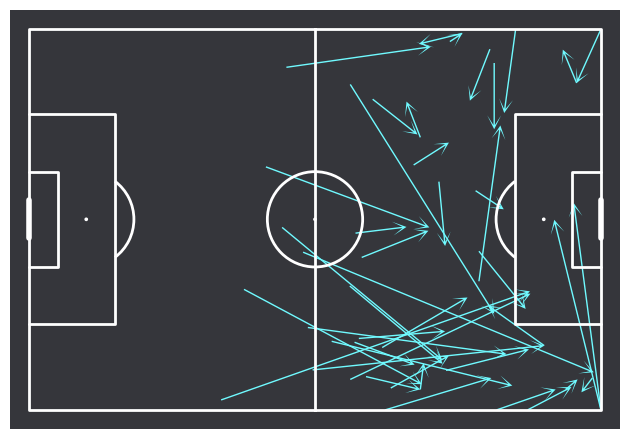

In [285]:
# Plot the pitch
pitch = Pitch(pitch_type='statsbomb', line_zorder=2, line_color='white',
              pitch_color='#35363B')
fig, ax = pitch.draw()

# Plot the arrows
lines = pitch.arrows(passes_final_third.x, passes_final_third.y,
                     passes_final_third.x_end,passes_final_third.y_end, ax=ax,
                      color='#70FAFF',width=1,
             headwidth=10, headlength=10, headaxislength=3)

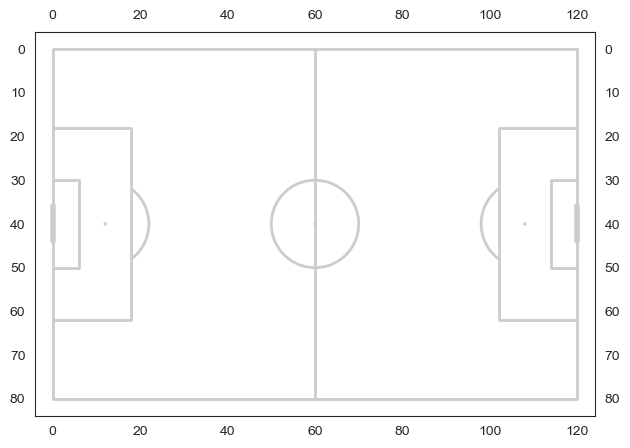

In [286]:
pitch = Pitch(pitch_type='statsbomb',  # example plotting a tracab pitch
              pitch_length=105, pitch_width=68,
              axis=True, label=True)  # showing axis labels is optional
fig, ax = pitch.draw()

In [287]:
passes_box=Colombia_passes[(Colombia_passes.x_end>105) & (Colombia_passes.y_end>19) & (Colombia_passes.y_end<61)]

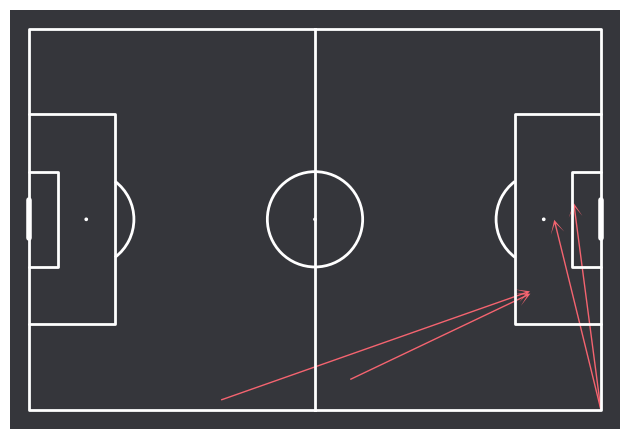

In [288]:
# Plot the pitch
pitch = Pitch(pitch_type='statsbomb', line_zorder=2, line_color='white',
              pitch_color='#35363B')
fig, ax = pitch.draw()

# Plot the arrows
lines = pitch.arrows(passes_box.x, passes_box.y,
                     passes_box.x_end,passes_box.y_end, ax=ax,
                      color='#f56470',width=1,
             headwidth=10, headlength=10, headaxislength=3)

In [289]:
shots_box=Colombia_shots[(Colombia_shots.x>105) & (Colombia_shots.y>19) & (Colombia_shots.y<61)]

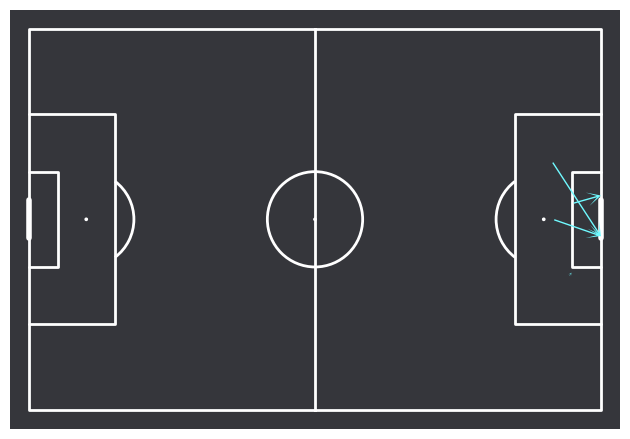

In [290]:
# Plot the pitch
pitch = Pitch(pitch_type='statsbomb', line_zorder=2, line_color='white',
              pitch_color='#35363B')
fig, ax = pitch.draw()

# Plot the arrows
#lines = pitch.arrows(Colombia_shots.x, Colombia_shots.y,
 #                    Colombia_shots.x_end,Colombia_shots.y_end, ax=ax,
  #                    color='red',width=1,
   #          headwidth=10, headlength=10, headaxislength=3)

lines = pitch.arrows(shots_box.x, shots_box.y,
                     shots_box.x_end,shots_box.y_end, ax=ax,
                      color='#70FAFF',width=1,
             headwidth=10, headlength=10, headaxislength=3,  zorder=4)

In [291]:
Colombia_events[((Colombia_events.type=='Pass') | (Colombia_events.type=='Shot')) &
               (Colombia_events.team=="Colombia Women's")
                ][['type','team','shot_outcome']]

,type,team,shot_outcome
10,Pass,Colombia Women's,NaN
14,Pass,Colombia Women's,NaN
16,Pass,Colombia Women's,NaN
17,Pass,Colombia Women's,NaN
18,Pass,Colombia Women's,NaN
...,...,...,...
3553,Shot,Colombia Women's,Blocked
3554,Shot,Colombia Women's,Goal
3562,Shot,Colombia Women's,Saved
3564,Shot,Colombia Women's,Blocked


## Linda Caicedo

In [292]:
Linda=coldf[coldf.player=='Linda Lizeth Caicedo Alegría']
Linda

,ball_receipt_outcome,counterpress,dribble_outcome,duel_outcome,duel_type,interception_outcome,location,minute,second,pass_cross,...,possession_team,team,shot_end_location,type,shot_outcome,substitution_replacement,tactics,under_pressure,pass_cut_back,block_deflection
45,NaN,NaN,NaN,NaN,NaN,NaN,"[105.0, 2.6]",3,19,NaN,...,Colombia Women's,Colombia Women's,NaN,Pass,NaN,NaN,NaN,True,NaN,NaN
95,NaN,NaN,NaN,NaN,NaN,NaN,"[98.9, 71.0]",12,8,NaN,...,Colombia Women's,Colombia Women's,NaN,Pass,NaN,NaN,NaN,NaN,NaN,NaN
98,NaN,NaN,NaN,NaN,NaN,NaN,"[106.8, 75.8]",12,16,NaN,...,Colombia Women's,Colombia Women's,NaN,Pass,NaN,NaN,NaN,True,NaN,NaN
99,NaN,NaN,NaN,NaN,NaN,NaN,"[97.0, 75.7]",12,19,NaN,...,Colombia Women's,Colombia Women's,NaN,Pass,NaN,NaN,NaN,True,NaN,NaN
123,NaN,NaN,NaN,NaN,NaN,NaN,"[54.3, 5.6]",14,10,NaN,...,Colombia Women's,Colombia Women's,NaN,Pass,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16717,NaN,NaN,Incomplete,NaN,NaN,NaN,"[81.8, 3.4]",94,54,NaN,...,Colombia Women's,Colombia Women's,NaN,Dribble,NaN,NaN,NaN,True,NaN,NaN
16726,NaN,NaN,NaN,NaN,NaN,NaN,"[100.0, 24.0]",38,17,NaN,...,Korea Republic Women's,Colombia Women's,"[120.0, 40.9, 1.6]",Shot,Goal,NaN,NaN,True,NaN,NaN
16736,NaN,NaN,NaN,NaN,NaN,NaN,"[99.1, 36.1]",80,31,NaN,...,Colombia Women's,Colombia Women's,"[100.9, 36.7]",Shot,Blocked,NaN,NaN,NaN,NaN,NaN
16790,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,33,NaN,...,Korea Republic Women's,Colombia Women's,NaN,Injury Stoppage,NaN,NaN,NaN,NaN,NaN,NaN


In [293]:
Linda[['x','y']]=Linda.location.apply(pd.Series)
Linda[['x_shend','y_shend','z_shend']]=Linda.shot_end_location.apply(pd.Series)
Linda[['x_pend','y_pend']]=Linda.pass_end_location.apply(pd.Series)
Linda

C:\Users\Interventoria\AppData\Local\Temp\ipykernel_7648\3875879067.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Interventoria\AppData\Local\Temp\ipykernel_7648\3875879067.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Interventoria\AppData\Local\Temp\ipykernel_7648\3875879067.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

,ball_receipt_outcome,counterpress,dribble_outcome,duel_outcome,duel_type,interception_outcome,location,minute,second,pass_cross,...,under_pressure,pass_cut_back,block_deflection,x,y,x_shend,y_shend,z_shend,x_pend,y_pend
45,NaN,NaN,NaN,NaN,NaN,NaN,"[105.0, 2.6]",3,19,NaN,...,True,NaN,NaN,105.0,2.6,NaN,NaN,NaN,96.0,3.8
95,NaN,NaN,NaN,NaN,NaN,NaN,"[98.9, 71.0]",12,8,NaN,...,NaN,NaN,NaN,98.9,71.0,NaN,NaN,NaN,93.5,70.5
98,NaN,NaN,NaN,NaN,NaN,NaN,"[106.8, 75.8]",12,16,NaN,...,True,NaN,NaN,106.8,75.8,NaN,NaN,NaN,108.4,75.8
99,NaN,NaN,NaN,NaN,NaN,NaN,"[97.0, 75.7]",12,19,NaN,...,True,NaN,NaN,97.0,75.7,NaN,NaN,NaN,77.0,77.7
123,NaN,NaN,NaN,NaN,NaN,NaN,"[54.3, 5.6]",14,10,NaN,...,NaN,NaN,NaN,54.3,5.6,NaN,NaN,NaN,41.2,3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16717,NaN,NaN,Incomplete,NaN,NaN,NaN,"[81.8, 3.4]",94,54,NaN,...,True,NaN,NaN,81.8,3.4,NaN,NaN,NaN,NaN,NaN
16726,NaN,NaN,NaN,NaN,NaN,NaN,"[100.0, 24.0]",38,17,NaN,...,True,NaN,NaN,100.0,24.0,120.0,40.9,1.6,NaN,NaN
16736,NaN,NaN,NaN,NaN,NaN,NaN,"[99.1, 36.1]",80,31,NaN,...,NaN,NaN,NaN,99.1,36.1,100.9,36.7,NaN,NaN,NaN
16790,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,33,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


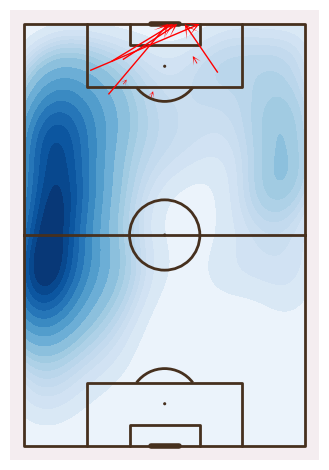

In [294]:
pitch = VerticalPitch(pitch_type='statsbomb', line_zorder=2, pitch_color='#f4edf0',line_color='#46301E')
fig, ax = pitch.draw()

kde=pitch.kdeplot(x=Linda.x, y=Linda.y, ax=ax,fill=True, levels=18,
                    # shade the lowest area so it looks smooth
                    # so even if there are no events it gets some color
                    shade_lowest=True,
                    cut=4,  # extended the cut so it reaches the bottom edge
                    cmap='Blues')

arrows = pitch.arrows(Linda.x, Linda.y,
                     Linda.x_shend,Linda.y_shend, ax=ax,
                      color='r',width=1,
             headwidth=10, headlength=10, headaxislength=3,  zorder=4)



fig.savefig('Linda Caicedo Colombia.svg', format='svg', dpi=200, transparent=True)

In [295]:
import json
import time

import requests
from bs4 import BeautifulSoup

from pydantic import BaseModel

from typing import List, Optional

from selenium import webdriver

from supabase import create_client, Client

In [296]:
#%pip install pydantic
#%pip install selenium
#%pip install supabase
#%pip install psycopg2-binary
#%pip install bs4
#%pip install html5lib

In [297]:
#driver = webdriver.Chrome()

In [298]:
url='https://es.wikipedia.org/wiki/Categor%C3%ADa_Primera_A'
r=requests.get(url)
print(r)

<CachedResponse [200]: created: 2023-12-06 12:31:55 Hora estándar del Este, expires: 2023-12-06 13:34:21 Hora estándar del Este (fresh), size: 902.00 KiB, request: GET https://es.wikipedia.org/wiki/Categor%C3%ADa_Primera_A>


In [299]:
soup=BeautifulSoup(r.text,"lxml")
table=soup.find('table',class_='wikitable')
print(table)

<table class="wikitable" style="width:95%; font-size:90%">
<tbody><tr>
<th>Equipo
</th>
<th>Entrenador
</th>
<th>Ciudad
</th>
<th>Estadio
</th>
<th data-sort-type="number"><a href="/wiki/Anexo:Estadios_de_Colombia" title="Anexo:Estadios de Colombia">Aforo</a>
</th></tr>
<tr>
<td><span class="flagicon"><span class="mw-image-border" typeof="mw:File"><a class="mw-file-description" href="/wiki/Archivo:Flag_of_Antioquia_Department.svg" title="Bandera del departamento de Antioquia"><img alt="Bandera del departamento de Antioquia" class="mw-file-element" data-file-height="600" data-file-width="900" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/3/33/Flag_of_Antioquia_Department.svg/20px-Flag_of_Antioquia_Department.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/3/33/Flag_of_Antioquia_Department.svg/30px-Flag_of_Antioquia_Department.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/3/33/Flag_of_Antioquia_Department.svg/40px-Flag_of_

In [300]:
headers=table.find_all('th')
print(headers)

[<th>Equipo
</th>, <th>Entrenador
</th>, <th>Ciudad
</th>, <th>Estadio
</th>, <th data-sort-type="number"><a href="/wiki/Anexo:Estadios_de_Colombia" title="Anexo:Estadios de Colombia">Aforo</a>
</th>]


In [301]:
titles=[]
for i in headers:
    title=i.text
    titles.append(title)
    
print(titles)

['Equipo\n', 'Entrenador\n', 'Ciudad\n', 'Estadio\n', 'Aforo\n']


In [302]:
df9=pd.DataFrame(columns=titles)
df9

,Equipo\n,Entrenador\n,Ciudad\n,Estadio\n,Aforo\n


In [303]:
import requests
from bs4 import BeautifulSoup, Comment
import pandas as pd

# Fetch the page content
url = 'https://fbref.com/en/comps/106/shooting/Womens-World-Cup-Stats'
response = requests.get(url)
html = response.content

# Parse with BeautifulSoup
soup = BeautifulSoup(html, 'html.parser')

# Find the comment containing the table
comments = soup.find_all(string=lambda text: isinstance(text, Comment))
table_html = None
for comment in comments:
    if 'stats_shooting' in comment:
        table_html = BeautifulSoup(comment, 'html.parser')
        break

# Check if the table was found
if table_html:
    # Parse the table HTML and convert it to DataFrame
    df = pd.read_html(str(table_html), attrs={'id': 'stats_shooting'})[0]

In [304]:
df.head(10)

Unnamed: 0_level_0  Unnamed: 1_level_0 Unnamed: 2_level_0  \
                  Rk              Player                Pos   
0                  1    Teresa Abelleira                 MF   
1                  2     Deborah Abiodun                 MF   
2                  3             Adriana                 MF   
3                  4            Lily Agg                 MF   
4                  5     Eseosa Aigbogun                 DF   
5                  6   Rasheedat Ajibade                 FW   
6                  7     Michelle Alozie                 DF   
7                  8  Katherine Alvarado                 MF   
8                  9         Lúcia Alves                 DF   
9                 10      Catarina Amado                 DF   

   Unnamed: 3_level_0 Unnamed: 4_level_0 Unnamed: 5_level_0  \
                Squad                Age               Born   
0            es Spain                 23               2000   
1          ng Nigeria                 19               2003   
2           br Brazil                 26               1996   
3  ie Rep. of Ireland                 29               1993   
4      ch Switzerland                 30               1993   
5          ng Nigeria                 23               1999   
6          ng Nigeria                 26               1997   
7       cr Costa Rica                 32               1991   
8         pt Portugal                 25               1997   
9         pt Portugal                 23               1999   

  Unnamed: 6_level_0 Standard          ...                   Expected       \
                 90s      Gls  Sh SoT  ...  Dist FK PK PKatt       xG npxG   
0                6.7        1  10   4  ...  29.7  1  0     0      0.3  0.3   
1                1.0        0   1   0  ...  27.5  0  0     0      0.0  0.0   
2                2.9        0   8   2  ...  21.9  1  0     0      1.1  1.1   
3                1.2        0   1   1  ...  30.6  0  0     0      0.0  0.0   
4                3.5        0   0   0  ...   NaN  0  0     0      0.0  0.0   
5                3.3        0   6   3  ...  19.5  0  0     0      0.5  0.5   
6                4.3        0   6   0  ...  16.3  0  0     0      0.5  0.5   
7                3.0        0   0   0  ...   NaN  0  0     0      0.0  0.0   
8                1.1        0   2   2  ...  12.2  0  0     0      0.4  0.4   
9                1.8        0   0   0  ...   NaN  0  0     0      0.0  0.0   

                        Unnamed: 24_level_0  
  npxG/Sh  G-xG np:G-xG             Matches  
0    0.03  +0.7    +0.7             Matches  
1    0.03   0.0     0.0             Matches  
2    0.13  -1.1    -1.1             Matches  
3    0.03   0.0     0.0             Matches  
4     NaN   0.0     0.0             Matches  
5    0.08  -0.5    -0.5             Matches  
6    0.08  -0.5    -0.5             Matches  
7     NaN   0.0     0.0             Matches  
8    0.20  -0.4    -0.4             Matches  
9     NaN   0.0     0.0             Matches  

[10 rows x 25 columns]

In [305]:
df.columns = [second.split(",")[-1].strip() for _, second in df.columns]
df=df[['Player', 'Pos', 'Squad', 'Age','90s', 'Gls',
       'Sh', 'SoT', 'SoT%', 'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT', 'Dist',
       'xG','G-xG', 'np:G-xG']]

In [306]:
df=df[['Player','Squad', 'Gls', 'xG']].sort_values(by='xG', ascending=True)

In [307]:
df = df[df['Player'] != 'Player']
df.sort_values(by='xG',ascending=False)

,Player,Squad,Gls,xG
158,Kadidiatou Diani,fr France,4,5.1
260,Jennifer Hermoso,es Spain,3,4.6
483,Alba Redondo,es Spain,3,4.5
503,Jill Roord,nl Netherlands,4,3.6
609,Riko Ueki,jp Japan,2,3.4
...,...,...,...,...
626,Yao Wei,cn China PR,0,0.0
128,Priscila Chinchilla,cr Costa Rica,0,0.0
590,Trần Thị Thu Thảo,vn Vietnam,0,0.0
642,Claudia Zornoza,es Spain,0,0.0


In [308]:
df['Squad']=df['Squad'].str.split(n=1).str[1]
df=df.sort_values(by='Gls', ascending=False)
df

,Player,Squad,Gls,xG
387,Hinata Miyazawa,Japan,5,2.4
158,Kadidiatou Diani,France,4,5.1
503,Jill Roord,Netherlands,4,3.6
463,Alexandra Popp,Germany,4,3.3
279,Amanda Ilestedt,Sweden,4,2.6
...,...,...,...,...
590,Trần Thị Thu Thảo,Vietnam,0,0.0
87,Ryley Bugay,Philippines,0,0.0
131,Lene Christensen,Denmark,0,0.0
589,Trần Thị Kim Thanh,Vietnam,0,0.0


In [309]:
url='https://fbref.com/en/comps/106/keepers/Womens-World-Cup-Stats'
r=requests.get(url)
print(r)

<CachedResponse [200]: created: 2023-12-06 12:32:10 Hora estándar del Este, expires: 2023-12-06 13:34:27 Hora estándar del Este (fresh), size: 311.32 KiB, request: GET https://fbref.com/en/comps/106/keepers/Womens-World-Cup-Stats>


In [310]:
teams=pd.read_html(r.text)
df4=teams[0]
df4.columns

MultiIndex([('Unnamed: 0_level_0',  'Squad'),
            ('Unnamed: 1_level_0',   '# Pl'),
            (      'Playing Time',     'MP'),
            (      'Playing Time', 'Starts'),
            (      'Playing Time',    'Min'),
            (      'Playing Time',    '90s'),
            (       'Performance',     'GA'),
            (       'Performance',   'GA90'),
            (       'Performance',   'SoTA'),
            (       'Performance',  'Saves'),
            (       'Performance',  'Save%'),
            (       'Performance',      'W'),
            (       'Performance',      'D'),
            (       'Performance',      'L'),
            (       'Performance',     'CS'),
            (       'Performance',    'CS%'),
            (     'Penalty Kicks',  'PKatt'),
            (     'Penalty Kicks',    'PKA'),
            (     'Penalty Kicks',   'PKsv'),
            (     'Penalty Kicks',    'PKm'),
            (     'Penalty Kicks',  'Save%')],
           )

In [311]:
df4.columns = [second.split(",")[-1].strip() for _, second in df4.columns]
df4=df4[['Squad','MP','GA','Min','CS','GA90']]
df4.head(4)

,Squad,MP,GA,Min,CS,GA90
0,ar Argentina,3,5,270,0,1.67
1,au Australia,7,8,660,4,1.09
2,br Brazil,3,2,270,2,0.67
3,ca Canada,3,5,270,1,1.67


In [312]:
df4['Squad'] = df4['Squad'].str.split().str[-1]
df4.head(4)

C:\Users\Interventoria\AppData\Local\Temp\ipykernel_7648\3828977955.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Squad,MP,GA,Min,CS,GA90
0,Argentina,3,5,270,0,1.67
1,Australia,7,8,660,4,1.09
2,Brazil,3,2,270,2,0.67
3,Canada,3,5,270,1,1.67


In [313]:
url='https://fbref.com/en/comps/106/shooting/Womens-World-Cup-Stats'
r=requests.get(url)
teams=pd.read_html(r.text)
df5=teams[0]
df5.columns = [second.split(",")[-1].strip() for _, second in df5.columns]
df5['Squad'] = df5['Squad'].str.split().str[-1]
df5=df5[['Squad','Gls','Sh','SoT','90s']]
df5.head(4)

,Squad,Gls,Sh,SoT,90s
0,Argentina,2,24,7,3.0
1,Australia,10,97,28,7.3
2,Brazil,5,61,20,3.0
3,Canada,1,43,12,3.0


In [314]:
stats=df4.merge(df5, on='Squad')
stats=stats[stats.MP>=5]
stats['Gls90']=(stats['Gls']/stats['90s']).round(2)
stats

,Squad,MP,GA,Min,CS,GA90,Gls,Sh,SoT,90s,Gls90
1,Australia,7,8,660,4,1.09,10,97,28,7.3,1.37
5,Colombia,5,4,450,2,0.80,6,62,17,5.0,1.20
8,England,7,4,660,3,0.55,13,95,39,7.3,1.78
9,France,5,4,480,3,0.75,12,93,28,5.3,2.26
14,Japan,5,3,450,3,0.60,14,81,33,5.0,2.80
17,Netherlands,5,3,480,3,0.56,12,83,33,5.3,2.26
26,Spain,7,7,660,3,0.95,17,155,49,7.3,2.33
27,Sweden,7,4,660,4,0.55,14,81,28,7.3,1.92


In [315]:
new_directory=r"C:\Users\Interventoria\Desktop\Daniel cursos\Data_Analyst\Python\Soccer analysis\FWCcol2023\escudoteca.com"
os.chdir(new_directory)

In [316]:
stats['path'] =stats['Squad'] + '.png'
stats

,Squad,MP,GA,Min,CS,GA90,Gls,Sh,SoT,90s,Gls90,path
1,Australia,7,8,660,4,1.09,10,97,28,7.3,1.37,Australia.png
5,Colombia,5,4,450,2,0.80,6,62,17,5.0,1.20,Colombia.png
8,England,7,4,660,3,0.55,13,95,39,7.3,1.78,England.png
9,France,5,4,480,3,0.75,12,93,28,5.3,2.26,France.png
14,Japan,5,3,450,3,0.60,14,81,33,5.0,2.80,Japan.png
17,Netherlands,5,3,480,3,0.56,12,83,33,5.3,2.26,Netherlands.png
26,Spain,7,7,660,3,0.95,17,155,49,7.3,2.33,Spain.png
27,Sweden,7,4,660,4,0.55,14,81,28,7.3,1.92,Sweden.png


In [317]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox # to import imagessns.set_style('white')

In [318]:
def getImage(path):
    return OffsetImage(plt.imread(path), zoom=0.17, alpha=1)

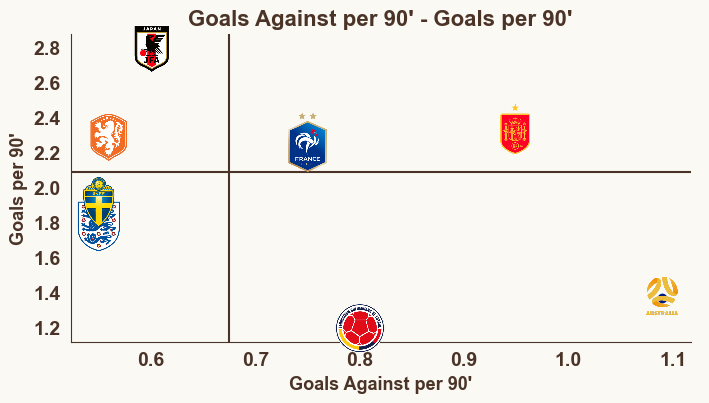

In [319]:
sns.set_style('white')
x =stats['GA90']
y=stats.Gls90

promx=stats['GA90'].median()
promy=stats.Gls90.median()

fig, ax= plt.subplots(figsize=(8,4))

ax.scatter(stats['GA90'], stats.Gls90)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#4B3427')
ax.spines['bottom'].set_color('#4B3427')
ax.set_facecolor("#FAF9F4") #inbox color
fig.set_facecolor('#FAF9F4')#outbox color

#definimos labels
nombreejex="Goals Against per 90'" 
nombreejey="Goals per 90'"
plt.xlabel(nombreejex,color='#4B3427', size=13, weight='bold')
plt.ylabel(nombreejey, color='#4B3427', size=13, weight='bold')
plt.yticks(color='#4B3427', size=14, weight='bold')
plt.xticks(color='#4B3427', size=14, weight='bold')

#definimos lineas de media
ax.axhline(promy,color='#4B3427')
ax.axvline(promx,color='#4B3427')

#titulo
plt.title(f'{nombreejex} - {nombreejey}', fontsize =16, color='#4B3427', weight='bold')

for index, row in stats.iterrows():
    ab=AnnotationBbox(getImage(row['path']), (row['GA90'], row['Gls90']), frameon=False)
    ax.add_artist(ab)

fig.savefig('Gls - GA.svg', format='svg', dpi=200, transparent=True)

In [320]:
os.listdir()

['Australia.png',
 'Colombia.png',
 'England.png',
 'Formation Colombia.svg',
 'France.png',
 'Gls - GA.svg',
 'Japan.png',
 'Netherlands.png',
 'Pass Network Colombia.svg',
 'Passing heatmap Colombia.svg',
 'sankey_diagram.svg',
 'Spain.png',
 'Sweden.png']